In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Initial Data Load:

In [60]:
df = pd.read_csv('Data/to_model.csv', index_col = 0)

In [61]:
df.reset_index(drop = True, inplace = True)
df.head(5)


,Winner,R_fighter,Fighter,Height,Reach,Stance,Weight,age,loss,win,...,attendance,num_rounds,label,matches,matches.1,Reach_diff,Weight_diff,Height_diff,round_age,round_age.1
0,win,Charles Oliveira,Charles Oliveira,61.0,74.0,Orthodox,155.0,30.43,8.0,16.0,...,0.0,5,0,26.0,17.0,-3.0,-15.0,-8.0,30.0,28.0
1,win,Gilbert Burns,Gilbert Burns,61.0,71.0,Orthodox,170.0,33.67,3.0,10.0,...,0.0,3,0,14.0,32.0,-1.0,0.0,-12.0,34.0,42.0
2,win,Renato Moicano,Damir Hadzovic,69.0,70.0,Orthodox,155.0,33.62,3.0,3.0,...,0.0,3,1,7.0,9.0,-2.0,0.0,8.0,34.0,31.0
3,win,Nikita Krylov,Nikita Krylov,75.0,77.0,Orthodox,205.0,28.04,5.0,7.0,...,0.0,3,0,13.0,5.0,-5.0,0.0,-3.0,28.0,28.0
4,win,Francisco Trinaldo,Francisco Trinaldo,69.0,70.0,Southpaw,155.0,41.58,6.0,14.0,...,0.0,3,0,21.0,17.0,2.0,0.0,1.0,42.0,35.0


In [62]:
pd.set_option('display.max_rows', 100)
df.isna().any()

Winner                           False
R_fighter                        False
Fighter                          False
Height                           False
Reach                            False
Stance                           False
Weight                           False
age                              False
loss                             False
win                              False
draws                            False
streak                           False
cum_match_time                   False
avg_cum_KD                       False
avg_cum_Sub. att                 False
avg_cum_Pass                     False
avg_cum_Rev.                     False
avg_cum_Sig. str. Hits           False
avg_cum_Sig. str. Attempts       False
avg_cum_Total str. Hits          False
avg_cum_Total str. Attempts      False
avg_cum_Td Hits                  False
avg_cum_Td Attempts              False
avg_cum_Head Hits                False
avg_cum_Head Attempts            False
avg_cum_Body Hits        

In [63]:
df.columns

Index(['Winner', 'R_fighter', 'Fighter', 'Height', 'Reach', 'Stance', 'Weight',
       'age', 'loss', 'win', 'draws', 'streak', 'cum_match_time', 'avg_cum_KD',
       'avg_cum_Sub. att', 'avg_cum_Pass', 'avg_cum_Rev.',
       'avg_cum_Sig. str. Hits', 'avg_cum_Sig. str. Attempts',
       'avg_cum_Total str. Hits', 'avg_cum_Total str. Attempts',
       'avg_cum_Td Hits', 'avg_cum_Td Attempts', 'avg_cum_Head Hits',
       'avg_cum_Head Attempts', 'avg_cum_Body Hits', 'avg_cum_Body Attempts',
       'avg_cum_Leg Hits', 'avg_cum_Leg Attempts', 'avg_cum_Distance Hits',
       'avg_cum_Distance Attempts', 'avg_cum_Clinch Hits',
       'avg_cum_Clinch Attempts', 'avg_cum_Ground Hits',
       'avg_cum_Ground Attempts', 'eff_sig_str', 'eff_hits', 'eff_tds',
       'eff_head', 'eff_leg', 'eff_body', 'eff_distance', 'eff_clinch',
       'eff_ground', 'Fighter.1', 'Height.1', 'Reach.1', 'Stance.1',
       'Weight.1', 'age.1', 'loss.1', 'win.1', 'draws.1', 'streak.1',
       'cum_match_time.1', 'av

In [64]:
df.shape

(5445, 99)

# Prepare Data for Model

### Drop Irrelevant

In [65]:
drop_columns = ['Winner', 'R_fighter', 'Fighter', 'Fighter.1', 'location', 'Height', 'Weight',
                'Reach', 'Height.1', 'Weight.1', 'Reach.1','round_age', 'round_age.1', 'attendance']
df.drop(drop_columns, axis = 1, inplace = True)

### One-hot-encode Categorical

In [66]:
from sklearn.preprocessing import MultiLabelBinarizer

In [67]:
mlb_weight = MultiLabelBinarizer()
mlb_weight.fit([df['WEIGHT_CLASS']])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [68]:
weight_classes = pd.DataFrame(mlb_weight.transform([[item] for item in df['WEIGHT_CLASS']]))
weight_classes.columns = mlb_weight.classes_
weight_classes

,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Open Weight,Super Heavyweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5440,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5441,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5442,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5443,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [69]:
mlb_stance = MultiLabelBinarizer()
mlb_stance.fit([df['Stance.1']]) #Stance.1 includes all unique values of stance

MultiLabelBinarizer(classes=None, sparse_output=False)

In [70]:
stance = pd.DataFrame(mlb_stance.transform([[item] for item in df['Stance']]))
stance.columns = mlb_stance.classes_

stance1 = pd.DataFrame(mlb_stance.transform([[item] for item in df['Stance.1']]))
stance1.columns = ['{}.1'.format(item) for item in mlb_stance.classes_]

In [71]:
final_data = pd.concat([df, weight_classes, stance, stance1], axis = 1)

### Final Drop:

In [72]:
drop_columns = ['WEIGHT_CLASS', 'Stance', 'Stance.1']
final_data.drop(drop_columns, axis = 1, inplace = True)

# ML Models:

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [74]:
X = final_data.loc[:, ~final_data.columns.isin(['label'])]
y = final_data.loc[:, 'label']

print(X.shape, y.shape)

(5445, 106) (5445,)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1000, stratify = y)

# Random Forest Classifier

In [99]:
rf_params = {
    'n_estimators': [100],
    'max_features': [20, 40, 60, 80, 100]
}

In [100]:
rfGrid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5, verbose=1)

In [101]:
rfGrid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [102]:
rfGrid.best_estimator_.feature_importances_

array([2.94362371e-02, 4.86281723e-03, 5.94273126e-03, 1.09206608e-03,
       8.49663819e-03, 1.56792907e-02, 1.10231372e-02, 1.93955414e-02,
       1.31779821e-02, 7.83006779e-03, 1.61430333e-02, 7.71544958e-03,
       1.86057567e-02, 1.27313578e-02, 1.60062553e-02, 1.49406938e-02,
       2.81594995e-02, 9.82027455e-03, 1.03113088e-02, 1.15714011e-02,
       1.14449857e-02, 1.03580039e-02, 1.00616216e-02, 9.38790359e-03,
       9.29573469e-03, 1.11641721e-02, 1.80243940e-02, 1.70430574e-02,
       1.02073150e-02, 1.00229027e-02, 9.89763207e-03, 1.32227290e-02,
       9.04581587e-03, 1.05125719e-02, 1.22460669e-02, 9.93463496e-03,
       9.65017039e-03, 2.70615299e-02, 7.65980995e-03, 5.77050278e-03,
       1.24056140e-03, 8.17700767e-03, 1.53754526e-02, 1.64803138e-02,
       1.71927120e-02, 1.69393941e-02, 9.06110716e-03, 1.19538879e-02,
       9.61870427e-03, 1.93240250e-02, 1.31869997e-02, 1.25580585e-02,
       1.41772709e-02, 1.84632405e-02, 8.89887633e-03, 1.16571297e-02,
      

In [103]:
feat_imps = {}
for i, imp in enumerate(rfGrid.best_estimator_.feature_importances_):
    feat_imps[X_train.columns[i]] = imp
    
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats



[('age', 0.0294362371040773),
 ('avg_cum_Head Hits', 0.028159499483839966),
 ('age.1', 0.027061529919837696),
 ('avg_cum_Sub. att', 0.019395541448442785),
 ('avg_cum_Total str. Hits.1', 0.019324025011231163),
 ('avg_cum_Total str. Hits', 0.018605756698995692),
 ('avg_cum_Head Hits.1', 0.01846324048591104),
 ('avg_cum_Ground Hits', 0.01802439396196639),
 ('avg_cum_Ground Attempts.1', 0.01779822507833416),
 ('avg_cum_Sub. att.1', 0.017192712029532004),
 ('avg_cum_Ground Attempts', 0.017043057430859192),
 ('avg_cum_Pass.1', 0.0169393940558493),
 ('eff_head.1', 0.01664824404903881),
 ('avg_cum_KD.1', 0.01648031375447035),
 ('avg_cum_Sig. str. Hits', 0.01614303325254092),
 ('avg_cum_Td Hits', 0.016006255251785343),
 ('cum_match_time', 0.015679290698051872),
 ('cum_match_time.1', 0.01537545257929873),
 ('Reach_diff', 0.015363075143044183),
 ('matches.1', 0.015207904947368062),
 ('avg_cum_Ground Hits.1', 0.01509658002892853),
 ('avg_cum_Td Attempts', 0.014940693758061263),
 ('avg_cum_Td Attem

In [104]:
rfGrid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=100,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
rfGrid.score(X_test, y_test)

0.6179981634527089

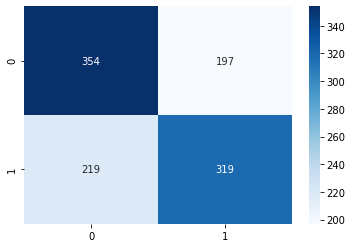

In [106]:
rf_roc = roc_auc_score(y_test, rfGrid.predict_proba(X_test)[:, 1])
rf_cm = confusion_matrix(y_test, rfGrid.predict(X_test))
sns.heatmap(rf_cm, annot=True, fmt = 'd', cmap = 'Blues')

# XGBoost

In [107]:
xgb_params = {
    'booster': ['gbtree', 'gblinear'],
    'eta': [.01, .05, .1, .15, .2, .3]
    
}

In [108]:
xgbGrid = GridSearchCV(XGBClassifier(), param_grid=xgb_params)

In [109]:
xgbGrid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [110]:
xgbGrid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [111]:
xgbGrid.score(X_test, y_test)

0.6290174471992653

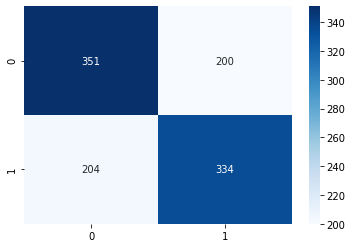

In [135]:
xgb_roc = roc_auc_score(y_test, xgbGrid.predict_proba(X_test)[:, 1])
xgb_cm = confusion_matrix(y_test, xgbGrid.predict(X_test))
sns.heatmap(xgb_cm, annot=True, fmt = 'd', cmap = 'Blues')

# Scale the Data:

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
list(X.columns)

['age',
 'loss',
 'win',
 'draws',
 'streak',
 'cum_match_time',
 'avg_cum_KD',
 'avg_cum_Sub. att',
 'avg_cum_Pass',
 'avg_cum_Rev.',
 'avg_cum_Sig. str. Hits',
 'avg_cum_Sig. str. Attempts',
 'avg_cum_Total str. Hits',
 'avg_cum_Total str. Attempts',
 'avg_cum_Td Hits',
 'avg_cum_Td Attempts',
 'avg_cum_Head Hits',
 'avg_cum_Head Attempts',
 'avg_cum_Body Hits',
 'avg_cum_Body Attempts',
 'avg_cum_Leg Hits',
 'avg_cum_Leg Attempts',
 'avg_cum_Distance Hits',
 'avg_cum_Distance Attempts',
 'avg_cum_Clinch Hits',
 'avg_cum_Clinch Attempts',
 'avg_cum_Ground Hits',
 'avg_cum_Ground Attempts',
 'eff_sig_str',
 'eff_hits',
 'eff_tds',
 'eff_head',
 'eff_leg',
 'eff_body',
 'eff_distance',
 'eff_clinch',
 'eff_ground',
 'age.1',
 'loss.1',
 'win.1',
 'draws.1',
 'streak.1',
 'cum_match_time.1',
 'avg_cum_KD.1',
 'avg_cum_Sub. att.1',
 'avg_cum_Pass.1',
 'avg_cum_Rev..1',
 'avg_cum_Sig. str. Hits.1',
 'avg_cum_Sig. str. Attempts.1',
 'avg_cum_Total str. Hits.1',
 'avg_cum_Total str. Attempt

In [151]:
scale_columns = ['age','loss','win','draws','streak','cum_match_time','avg_cum_KD',
                 'avg_cum_Sub. att', 'avg_cum_Pass','avg_cum_Rev.','avg_cum_Sig. str. Hits','avg_cum_Sig. str. Attempts',
                 'avg_cum_Total str. Hits','avg_cum_Total str. Attempts','avg_cum_Td Hits','avg_cum_Td Attempts',
                 'avg_cum_Head Hits','avg_cum_Head Attempts','avg_cum_Body Hits','avg_cum_Body Attempts',
                 'avg_cum_Leg Hits','avg_cum_Leg Attempts','avg_cum_Distance Hits','avg_cum_Distance Attempts',
                 'avg_cum_Clinch Hits','avg_cum_Clinch Attempts','avg_cum_Ground Hits','avg_cum_Ground Attempts',
                 'eff_sig_str','eff_hits','eff_tds','eff_head','eff_leg','eff_body','eff_distance','eff_clinch','eff_ground',
                 'age.1','loss.1','win.1','draws.1','streak.1','cum_match_time.1',
                 'avg_cum_KD.1','avg_cum_Sub. att.1','avg_cum_Pass.1','avg_cum_Rev..1','avg_cum_Sig. str. Hits.1',
                 'avg_cum_Sig. str. Attempts.1','avg_cum_Total str. Hits.1','avg_cum_Total str. Attempts.1',
                 'avg_cum_Td Hits.1','avg_cum_Td Attempts.1','avg_cum_Head Hits.1','avg_cum_Head Attempts.1',
                 'avg_cum_Body Hits.1','avg_cum_Body Attempts.1','avg_cum_Leg Hits.1','avg_cum_Leg Attempts.1',
                 'avg_cum_Distance Hits.1','avg_cum_Distance Attempts.1','avg_cum_Clinch Hits.1','avg_cum_Clinch Attempts.1',
                 'avg_cum_Ground Hits.1','avg_cum_Ground Attempts.1','eff_sig_str.1','eff_hits.1','eff_tds.1','eff_head.1',
                 'eff_leg.1','eff_body.1','eff_distance.1','eff_clinch.1','eff_ground.1','num_rounds','matches',
                 'matches.1','Reach_diff','Weight_diff','Height_diff'
]

unscale_columns = [item for item in X.columns if item not in scale_columns]
unscale_columns

['title_bout',
 'Bantamweight',
 'Catch Weight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'Light Heavyweight',
 'Lightweight',
 'Middleweight',
 'Open Weight',
 'Super Heavyweight',
 'Welterweight',
 "Women's Bantamweight",
 "Women's Featherweight",
 "Women's Flyweight",
 "Women's Strawweight",
 'Open Stance',
 'Orthodox',
 'Sideways',
 'Southpaw',
 'Switch',
 'Open Stance.1',
 'Orthodox.1',
 'Sideways.1',
 'Southpaw.1',
 'Switch.1']

In [152]:
scaler = StandardScaler()
X_scale_train = pd.DataFrame(scaler.fit_transform(X_train[scale_columns]), index=X_train.index)
X_scale_train.columns = scale_columns

In [153]:
X_scale_train = pd.concat([X_scale_train, X_train[unscale_columns]], axis = 1)
X_scale_train

,age,loss,win,draws,streak,cum_match_time,avg_cum_KD,avg_cum_Sub. att,avg_cum_Pass,avg_cum_Rev.,...,Open Stance,Orthodox,Sideways,Southpaw,Switch,Open Stance.1,Orthodox.1,Sideways.1,Southpaw.1,Switch.1
457,0.100643,1.154252,0.766162,-0.274519,-1.774096,1.195715,-0.125083,-0.379200,-0.004664,0.195427,...,0,0,0,1,0,0,1,0,0,0
1918,-0.178249,-0.824271,-0.586217,-0.274519,0.291100,-0.634736,-0.181651,-0.425156,-0.357450,-0.411694,...,0,0,0,1,0,0,1,0,0,0
309,-0.067024,-0.824271,-0.586217,-0.274519,0.291100,-0.835713,-0.181651,1.263748,0.724743,-0.411694,...,0,1,0,0,0,0,1,0,0,0
3133,1.953286,1.154252,-0.045266,-0.274519,-0.741498,-0.137491,-0.105118,0.103344,0.414864,-0.411694,...,0,1,0,0,0,0,1,0,0,0
4949,0.801195,0.164990,-0.315742,-0.274519,0.291100,-0.093830,-0.108445,-0.425156,-0.571982,0.122573,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,1.259375,1.648883,-0.045266,3.151853,-0.741498,0.107320,0.047948,-0.425156,-0.428961,-0.411694,...,0,1,0,0,0,0,1,0,0,0
3993,-0.477062,0.659621,0.225210,-0.274519,-0.741498,0.557786,-0.181651,0.120578,0.233704,1.895367,...,0,1,0,0,0,0,1,0,0,0
2317,0.567124,-0.329640,-0.856693,-0.274519,-0.741498,-0.754629,-0.181651,0.287171,-0.676864,2.599627,...,0,1,0,0,0,0,1,0,0,0
3455,0.172027,1.154252,0.225210,-0.274519,-0.741498,0.034379,-0.058533,-0.103460,0.300447,0.486845,...,0,1,0,0,0,0,1,0,0,0


In [154]:
X_scale_test = pd.DataFrame(scaler.transform(X_test[scale_columns]), index=X_test.index)
X_scale_test.columns = scale_columns

X_scale_test = pd.concat([X_scale_test, X_test[unscale_columns]], axis = 1)
X_scale_test

,age,loss,win,draws,streak,cum_match_time,avg_cum_KD,avg_cum_Sub. att,avg_cum_Pass,avg_cum_Rev.,...,Open Stance,Orthodox,Sideways,Southpaw,Switch,Open Stance.1,Orthodox.1,Sideways.1,Southpaw.1,Switch.1
1693,1.415422,2.143513,2.929969,-0.274519,-1.257797,1.510002,0.057931,-0.218352,-0.571982,-0.411694,...,0,1,0,0,0,0,1,0,0,0
2487,-0.203150,-0.824271,-0.856693,-0.274519,-0.225199,-0.634736,0.041293,-0.425156,-0.676864,-0.411694,...,0,1,0,0,0,0,1,0,0,0
2342,0.347994,0.659621,0.495686,-0.274519,1.323697,0.723246,-0.038567,-0.361966,-0.524308,0.098288,...,0,1,0,0,0,0,1,0,0,0
3744,0.905779,1.154252,0.225210,-0.274519,-0.741498,0.810220,-0.181651,-0.367711,0.147891,-0.168845,...,0,0,0,1,0,0,1,0,0,0
752,-0.646390,-0.824271,-0.856693,-0.274519,-0.225199,-0.721364,-0.181651,-0.425156,1.706822,2.016791,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0.284912,-0.824271,-0.586217,-0.274519,0.291100,-0.634736,0.041293,0.338872,-0.357450,-0.411694,...,0,1,0,0,0,0,1,0,0,0
2659,0.381196,-0.824271,0.225210,-0.274519,1.839996,-0.525238,-0.181651,0.114833,0.219402,-0.411694,...,0,0,0,1,0,0,1,0,0,0
2609,-0.741014,-0.824271,-0.586217,-0.274519,0.291100,-0.832768,-0.181651,-0.425156,-0.676864,-0.411694,...,0,0,0,0,1,0,1,0,0,0
2804,-0.912002,-0.824271,-0.586217,-0.274519,0.291100,-0.741288,0.194359,-0.425156,0.939275,-0.411694,...,0,1,0,0,0,0,0,0,1,0


In [155]:
print(X_scale_test.shape, X_scale_train.shape)

(1089, 106) (4356, 106)


# Logistic Regression

In [156]:
log_params = [{'penalty': ['l1', 'l2'],
               'C': [.25, .5, .75, 1],
               'max_iter': [1000],
              'solver': ['liblinear']}    
    ]

logGrid = GridSearchCV(LogisticRegression(), param_grid=log_params, cv=5, verbose=1)

In [170]:
logGrid.fit(X_scale_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    6.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'max_iter': [1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [171]:
logGrid.best_estimator_

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
logGrid.score(X_scale_test, y_test)

0.6189164370982553

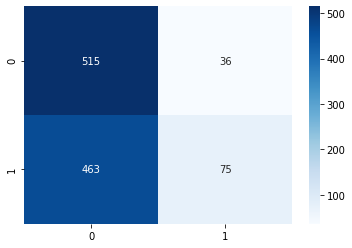

In [173]:
log_roc = roc_auc_score(y_test, logGrid.predict_proba(X_test)[:, 1])
log_cm = confusion_matrix(y_test, logGrid.predict(X_test))
sns.heatmap(log_cm, annot=True, fmt = 'd', cmap = 'Blues')

In [174]:
logGrid.predict(X_scale_test)

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

ROC AUC LOG:  0.6079180132101822
ROC AUC RF:  0.6701941046694418
ROC AUC XGB:  0.6867608066442223


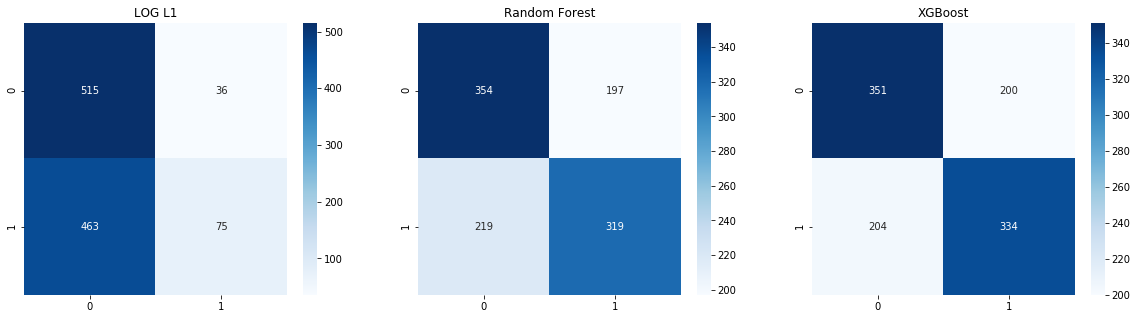

In [176]:
f, ax = plt.subplots(1, 3, figsize = [20, 5])

sns.heatmap(log_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[0])
sns.heatmap(rf_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[1])
sns.heatmap(xgb_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[2]);

ax[0].set_title('LOG L1')
ax[1].set_title('Random Forest')
ax[2].set_title('XGBoost')

#Relatively similar performance

print('ROC AUC LOG: ', log_roc)
print('ROC AUC RF: ', rf_roc)
print('ROC AUC XGB: ', xgb_roc)

# Blended Model:

In [259]:
X_T, X_val, y_T, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 1000, stratify = y_train)

In [260]:
log_unscale_params = {
    'max_iter': [5000],
    'C': [.25, .5, .75, 1],
    'solver': ['liblinear']
}

unscaleLogGrid = GridSearchCV(LogisticRegression(), param_grid=log_unscale_params)
unscaleLogGrid.fit(X_T, y_T)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'max_iter': [5000],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [261]:
blend_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_params)
blend_rf.fit(X_T, y_T)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [262]:
blend_xgb = GridSearchCV(XGBClassifier(), param_grid=xgb_params)
blend_xgb.fit(X_T, y_T)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

### Create Features:

In [263]:
blend_log_predictions = pd.Series(unscaleLogGrid.predict_proba(X_val)[:, 1], index=X_val.index)
blend_rf_predictions = pd.Series(blend_rf.predict_proba(X_val)[:, 1], index=X_val.index)
blend_xgb_predictions = pd.Series(blend_xgb.predict_proba(X_val)[:, 1], index=X_val.index)

### Create Test-set

In [274]:
print('LOG:', unscaleLogGrid.score(X_val, y_val), '\n')
print('RF:', blend_rf.score(X_val, y_val), '\n')
print('XGB:', blend_xgb.score(X_val, y_val), '\n')

blend_log_test = pd.Series(unscaleLogGrid.predict_proba(X_test)[:, 1], index = X_test.index)
blend_rf_test = pd.Series(blend_rf.predict_proba(X_test)[:, 1], index = X_test.index)
blend_xgb_test = pd.Series(blend_xgb.predict_proba(X_test)[:, 1], index = X_test.index)

X_blend_test = pd.concat([blend_log_test, blend_rf_test, blend_xgb_test], axis = 1)
X_blend_test.columns = ['LOG', 'RF', 'XGB']

LOG: 0.6158256880733946 

RF: 0.6467889908256881 

XGB: 0.6364678899082569 



In [275]:
blended_features = pd.concat([blend_log_predictions, blend_rf_predictions, blend_xgb_predictions, y_val], axis = 1)
blended_features.columns = ['LOG', 'RF', 'XGB', 'label']
blended_features

,LOG,RF,XGB,label
1815,0.603155,0.68,0.715954,1
1296,0.359372,0.34,0.279608,0
3372,0.530952,0.39,0.607641,0
3318,0.450342,0.33,0.432962,0
1562,0.155504,0.30,0.204984,0
...,...,...,...,...
3324,0.732472,0.68,0.617805,0
4971,0.865438,0.68,0.840218,1
1072,0.206897,0.37,0.320555,0
1218,0.301584,0.32,0.324718,0


In [276]:
blendLog = LogisticRegression()
blendLog.fit(blended_features.iloc[:, 0:3], blended_features.iloc[:, 3])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Blended Accuracy: 0.6078971533516988


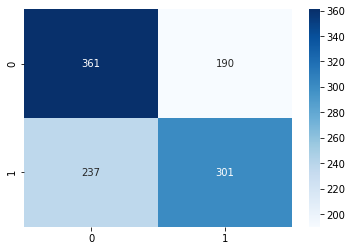

In [278]:
print('Blended Accuracy:', blendLog.score(X_blend_test, y_test))
blend_cm = confusion_matrix(y_test, blendLog.predict(X_blend_test))
sns.heatmap(blend_cm, annot=True, fmt = 'd', cmap = 'Blues');

# Neural Network:

In [177]:
from tensorflow.keras.layers import Layer, Dense, Input, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [178]:
class RocAucEval(Callback):
    def __init__(self, validation_data = (), interval = 5):
        
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0: #Test if interval has been met:
            y_pred = self.model.predict(self.X_val, verbose = 0)
            try:
                score = roc_auc_score(self.y_val, y_pred)
            except:
                score = 0
                pass
            print('\n ROC-AUC - epoch: {} score: {} \n'.format(epoch+1, score))


In [179]:
def get_model(dropout, n_size, input_size):
    model = Sequential()
    model.add(Dense(n_size, input_dim=input_size, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    

    model.compile(loss = 'binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    return model


In [180]:
X_small_train, X_val, y_small_train, y_val = train_test_split(X_scale_train, y_train, test_size = .2, random_state = 1000)
roc_eval = RocAucEval((X_val, y_val), interval=5)


# GridSearch

In [199]:
nn_params = {
    'dropout': [.2, .4, .6, .8],
    'n_size': [16, 32, 64, 128],
    'input_size': [X_scale_train.shape[1]],
    'epochs': [5,10,15,20]
}


In [200]:
mod = KerasClassifier(build_fn=get_model)
keras_grid = GridSearchCV(estimator=mod, param_grid=nn_params)

In [201]:
keras_grid.fit(X_scale_train, np.array(y_train), batch_size=32, callbacks=[roc_eval])

Train on 3484 samples
Epoch 1/5
2560/3484 [=====================>........] - ETA: 0s - loss: 0.8134 - accuracy: 0.5191
 ROC-AUC - epoch: 1 score: 0.6402854927281647 

3484/3484 [==============================] - 0s 109us/sample - loss: 0.7859 - accuracy: 0.5293
Epoch 2/5
3484/3484 [==============================] - 0s 41us/sample - loss: 0.6828 - accuracy: 0.5850
Epoch 3/5
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6628 - accuracy: 0.5982
Epoch 4/5
3484/3484 [==============================] - 0s 42us/sample - loss: 0.6456 - accuracy: 0.6134
Epoch 5/5
872/872 [==============================] - 0s 78us/sample - loss: 0.6366 - accuracy: 0.6250
Train on 3485 samples
Epoch 1/5
2560/3485 [=====================>........] - ETA: 0s - loss: 0.7131 - accuracy: 0.5383
 ROC-AUC - epoch: 1 score: 0.6425221689429067 

3485/3485 [==============================] - 0s 112us/sample - loss: 0.7027 - accuracy: 0.5544
Epoch 2/5
3485/3485 [==============================] - 0s 42us

3484/3484 [==============================] - 0s 44us/sample - loss: 0.6172 - accuracy: 0.6536
Epoch 5/5
872/872 [==============================] - 0s 75us/sample - loss: 0.6516 - accuracy: 0.6044
Train on 3485 samples
Epoch 1/5
2400/3485 [===================>..........] - ETA: 0s - loss: 0.6967 - accuracy: 0.5733
 ROC-AUC - epoch: 1 score: 0.6708920856478184 

3485/3485 [==============================] - 0s 112us/sample - loss: 0.6921 - accuracy: 0.5779
Epoch 2/5
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6481 - accuracy: 0.6141
Epoch 3/5
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6334 - accuracy: 0.6275
Epoch 4/5
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6157 - accuracy: 0.6476
Epoch 5/5
871/871 [==============================] - 0s 72us/sample - loss: 0.6394 - accuracy: 0.6280
Train on 3485 samples
Epoch 1/5
2336/3485 [===================>..........] - ETA: 0s - loss: 0.7162 - accuracy: 0.5449
 ROC-AUC 

3484/3484 [==============================] - 0s 40us/sample - loss: 0.6349 - accuracy: 0.6355
Epoch 8/10
3484/3484 [==============================] - 0s 42us/sample - loss: 0.6214 - accuracy: 0.6478
Epoch 9/10
3484/3484 [==============================] - 0s 44us/sample - loss: 0.6233 - accuracy: 0.6455
Epoch 10/10
872/872 [==============================] - 0s 118us/sample - loss: 0.6384 - accuracy: 0.6055
Train on 3485 samples
Epoch 1/10
3232/3485 [==========================>...] - ETA: 0s - loss: 0.7276 - accuracy: 0.5365
 ROC-AUC - epoch: 1 score: 0.585449999208723 

3485/3485 [==============================] - 0s 134us/sample - loss: 0.7266 - accuracy: 0.5392
Epoch 2/10
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6755 - accuracy: 0.5791
Epoch 3/10
3485/3485 [==============================] - 0s 45us/sample - loss: 0.6539 - accuracy: 0.5868
Epoch 4/10
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6429 - accuracy: 0.6138
Epoch 5/10
348

3485/3485 [==============================] - 0s 43us/sample - loss: 0.6323 - accuracy: 0.6238
Epoch 5/10
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6286 - accuracy: 0.6396
Epoch 6/10
3328/3485 [===========================>..] - ETA: 0s - loss: 0.6236 - accuracy: 0.6469
 ROC-AUC - epoch: 6 score: 0.7280908596960441 

3485/3485 [==============================] - 0s 59us/sample - loss: 0.6247 - accuracy: 0.6448
Epoch 7/10
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6088 - accuracy: 0.6605
Epoch 8/10
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6034 - accuracy: 0.6646
Epoch 9/10
3485/3485 [==============================] - 0s 45us/sample - loss: 0.5971 - accuracy: 0.6758
Epoch 10/10
871/871 [==============================] - 0s 76us/sample - loss: 0.6435 - accuracy: 0.6165
Train on 3485 samples
Epoch 1/10
3360/3485 [===========================>..] - ETA: 0s - loss: 0.6896 - accuracy: 0.5717
 ROC-AUC - epoch: 1 sc

3200/3485 [==========================>...] - ETA: 0s - loss: 0.7070 - accuracy: 0.5750
 ROC-AUC - epoch: 1 score: 0.6731445874018158 

3485/3485 [==============================] - 0s 136us/sample - loss: 0.7014 - accuracy: 0.5791
Epoch 2/10
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6508 - accuracy: 0.6138
Epoch 3/10
3485/3485 [==============================] - 0s 45us/sample - loss: 0.6325 - accuracy: 0.6298
Epoch 4/10
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6165 - accuracy: 0.6405
Epoch 5/10
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6077 - accuracy: 0.6674
Epoch 6/10
3392/3485 [============================>.] - ETA: 0s - loss: 0.6029 - accuracy: 0.6542
 ROC-AUC - epoch: 6 score: 0.7477461794510647 

3485/3485 [==============================] - 0s 58us/sample - loss: 0.6043 - accuracy: 0.6522
Epoch 7/10
3485/3485 [==============================] - 0s 53us/sample - loss: 0.5941 - accuracy: 0.6766
Epoch

3485/3485 [==============================] - 0s 44us/sample - loss: 0.5606 - accuracy: 0.7076
Epoch 9/10
3485/3485 [==============================] - 0s 44us/sample - loss: 0.5515 - accuracy: 0.7131
Epoch 10/10
871/871 [==============================] - 0s 81us/sample - loss: 0.6759 - accuracy: 0.6073
Train on 3485 samples
Epoch 1/10
3232/3485 [==========================>...] - ETA: 0s - loss: 0.6754 - accuracy: 0.5916
 ROC-AUC - epoch: 1 score: 0.6896770007438005 

3485/3485 [==============================] - 0s 127us/sample - loss: 0.6735 - accuracy: 0.5917
Epoch 2/10
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6358 - accuracy: 0.6296
Epoch 3/10
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6191 - accuracy: 0.6499
Epoch 4/10
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6052 - accuracy: 0.6594
Epoch 5/10
3485/3485 [==============================] - 0s 45us/sample - loss: 0.5932 - accuracy: 0.6763
Epoch 6/10
240

2592/3485 [=====================>........] - ETA: 0s - loss: 0.6353 - accuracy: 0.6354
 ROC-AUC - epoch: 6 score: 0.6844387472503124 

3485/3485 [==============================] - 1s 162us/sample - loss: 0.6334 - accuracy: 0.6373
Epoch 7/15
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6217 - accuracy: 0.6428
Epoch 8/15
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6195 - accuracy: 0.6511
Epoch 9/15
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6203 - accuracy: 0.6413
Epoch 10/15
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6164 - accuracy: 0.6413
Epoch 11/15
2528/3485 [====================>.........] - ETA: 0s - loss: 0.6057 - accuracy: 0.6503
 ROC-AUC - epoch: 11 score: 0.7082298079307052 

3485/3485 [==============================] - 0s 51us/sample - loss: 0.6116 - accuracy: 0.6471
Epoch 12/15
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6077 - accuracy: 0.6651
E

3485/3485 [==============================] - 0s 43us/sample - loss: 0.6292 - accuracy: 0.6407
Epoch 5/15
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6301 - accuracy: 0.6258
Epoch 6/15
2432/3485 [===================>..........] - ETA: 0s - loss: 0.6202 - accuracy: 0.6431
 ROC-AUC - epoch: 6 score: 0.7127559121577067 

3485/3485 [==============================] - 0s 53us/sample - loss: 0.6227 - accuracy: 0.6445
Epoch 7/15
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6143 - accuracy: 0.6514
Epoch 8/15
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6049 - accuracy: 0.6778
Epoch 9/15
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6028 - accuracy: 0.6674
Epoch 10/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.5966 - accuracy: 0.6683
Epoch 11/15
2752/3485 [======================>.......] - ETA: 0s - loss: 0.5921 - accuracy: 0.6857
 ROC-AUC - epoch: 11 score: 0.74637990789

Epoch 2/15
3484/3484 [==============================] - 0s 55us/sample - loss: 0.6526 - accuracy: 0.6131
Epoch 3/15
3484/3484 [==============================] - 0s 53us/sample - loss: 0.6313 - accuracy: 0.6363
Epoch 4/15
3484/3484 [==============================] - 0s 48us/sample - loss: 0.6229 - accuracy: 0.6470
Epoch 5/15
3484/3484 [==============================] - 0s 45us/sample - loss: 0.6181 - accuracy: 0.6570
Epoch 6/15
2496/3484 [====================>.........] - ETA: 0s - loss: 0.6025 - accuracy: 0.6643
 ROC-AUC - epoch: 6 score: 0.7396224026333696 

3484/3484 [==============================] - 0s 52us/sample - loss: 0.6039 - accuracy: 0.6659
Epoch 7/15
3484/3484 [==============================] - 0s 40us/sample - loss: 0.5981 - accuracy: 0.6751
Epoch 8/15
3484/3484 [==============================] - 0s 40us/sample - loss: 0.5926 - accuracy: 0.6851
Epoch 9/15
3484/3484 [==============================] - 0s 40us/sample - loss: 0.5825 - accuracy: 0.6897
Epoch 10/15
3484/3484 [==

2592/3485 [=====================>........] - ETA: 0s - loss: 0.7222 - accuracy: 0.5536
 ROC-AUC - epoch: 1 score: 0.6615233664087103 

3485/3485 [==============================] - 1s 150us/sample - loss: 0.7135 - accuracy: 0.5610
Epoch 2/15
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6507 - accuracy: 0.6169
Epoch 3/15
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6347 - accuracy: 0.6241
Epoch 4/15
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6190 - accuracy: 0.6514
Epoch 5/15
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6087 - accuracy: 0.6571
Epoch 6/15
2336/3485 [===================>..........] - ETA: 0s - loss: 0.6007 - accuracy: 0.6627
 ROC-AUC - epoch: 6 score: 0.7426292550918673 

3485/3485 [==============================] - 0s 54us/sample - loss: 0.6039 - accuracy: 0.6603
Epoch 7/15
3485/3485 [==============================] - 0s 43us/sample - loss: 0.5950 - accuracy: 0.6735
Epoch

871/871 [==============================] - 0s 94us/sample - loss: 0.7006 - accuracy: 0.5924
Train on 3485 samples
Epoch 1/15
2784/3485 [======================>.......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5790
 ROC-AUC - epoch: 1 score: 0.688458434221146 

3485/3485 [==============================] - 1s 148us/sample - loss: 0.6889 - accuracy: 0.5796
Epoch 2/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.6418 - accuracy: 0.6255
Epoch 3/15
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6250 - accuracy: 0.6385
Epoch 4/15
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6041 - accuracy: 0.6643
Epoch 5/15
3485/3485 [==============================] - 0s 44us/sample - loss: 0.5947 - accuracy: 0.6849
Epoch 6/15
3424/3485 [============================>.] - ETA: 0s - loss: 0.5817 - accuracy: 0.6837
 ROC-AUC - epoch: 6 score: 0.7566770587707776 

3485/3485 [==============================] - 0s 56us/sample - loss: 0.5830 - acc

3485/3485 [==============================] - 0s 38us/sample - loss: 0.6242 - accuracy: 0.6402
Epoch 9/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6177 - accuracy: 0.6413
Epoch 10/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6145 - accuracy: 0.6479
Epoch 11/20
2528/3485 [====================>.........] - ETA: 0s - loss: 0.6107 - accuracy: 0.6523
 ROC-AUC - epoch: 11 score: 0.7260440899523651 

3485/3485 [==============================] - 0s 52us/sample - loss: 0.6084 - accuracy: 0.6534
Epoch 12/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6040 - accuracy: 0.6551
Epoch 13/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6066 - accuracy: 0.6614
Epoch 14/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6006 - accuracy: 0.6594
Epoch 15/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.5954 - accuracy: 0.6631
Epoch 16/20
2688/3485 [======

3485/3485 [==============================] - 0s 39us/sample - loss: 0.6260 - accuracy: 0.6402
Epoch 8/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6232 - accuracy: 0.6327
Epoch 9/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6163 - accuracy: 0.6473
Epoch 10/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6163 - accuracy: 0.6476
Epoch 11/20
2592/3485 [=====================>........] - ETA: 0s - loss: 0.6135 - accuracy: 0.6508
 ROC-AUC - epoch: 11 score: 0.7053548349660015 

3485/3485 [==============================] - 0s 50us/sample - loss: 0.6160 - accuracy: 0.6451
Epoch 12/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6112 - accuracy: 0.6425
Epoch 13/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6088 - accuracy: 0.6582
Epoch 14/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6027 - accuracy: 0.6669
Epoch 15/20
3485/3485 [=======

Epoch 7/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6093 - accuracy: 0.6600
Epoch 8/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6079 - accuracy: 0.6611
Epoch 9/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6037 - accuracy: 0.6709
Epoch 10/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.5930 - accuracy: 0.6760
Epoch 11/20
2720/3485 [======================>.......] - ETA: 0s - loss: 0.5840 - accuracy: 0.6838
 ROC-AUC - epoch: 11 score: 0.7541449724899376 

3485/3485 [==============================] - 0s 50us/sample - loss: 0.5897 - accuracy: 0.6760
Epoch 12/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5845 - accuracy: 0.6815
Epoch 13/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.5813 - accuracy: 0.6921
Epoch 14/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.5799 - accuracy: 0.6901
Epoch 15/20
3485/34

Epoch 7/20
3484/3484 [==============================] - 0s 46us/sample - loss: 0.5982 - accuracy: 0.6673
Epoch 8/20
3484/3484 [==============================] - 0s 53us/sample - loss: 0.5866 - accuracy: 0.6866
Epoch 9/20
3484/3484 [==============================] - 0s 51us/sample - loss: 0.5805 - accuracy: 0.6880
Epoch 10/20
3484/3484 [==============================] - 0s 43us/sample - loss: 0.5716 - accuracy: 0.7012
Epoch 11/20
3424/3484 [============================>.] - ETA: 0s - loss: 0.5677 - accuracy: 0.6980
 ROC-AUC - epoch: 11 score: 0.781802739928363 

3484/3484 [==============================] - 0s 57us/sample - loss: 0.5671 - accuracy: 0.6986
Epoch 12/20
3484/3484 [==============================] - 0s 42us/sample - loss: 0.5650 - accuracy: 0.6978
Epoch 13/20
3484/3484 [==============================] - 0s 45us/sample - loss: 0.5562 - accuracy: 0.7127
Epoch 14/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.5515 - accuracy: 0.7090
Epoch 15/20
3484/348

Epoch 7/20
3485/3485 [==============================] - 0s 45us/sample - loss: 0.5970 - accuracy: 0.6651
Epoch 8/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.5909 - accuracy: 0.6778
Epoch 9/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5861 - accuracy: 0.6852
Epoch 10/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.5736 - accuracy: 0.7047
Epoch 11/20
2688/3485 [======================>.......] - ETA: 0s - loss: 0.5711 - accuracy: 0.6938
 ROC-AUC - epoch: 11 score: 0.7817658136701009 

3485/3485 [==============================] - 0s 49us/sample - loss: 0.5720 - accuracy: 0.6933
Epoch 12/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5662 - accuracy: 0.6970
Epoch 13/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5560 - accuracy: 0.7154
Epoch 14/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.5454 - accuracy: 0.7119
Epoch 15/20
3485/34

Epoch 7/20
3485/3485 [==============================] - 0s 53us/sample - loss: 0.5772 - accuracy: 0.6910
Epoch 8/20
3485/3485 [==============================] - 0s 52us/sample - loss: 0.5649 - accuracy: 0.7024
Epoch 9/20
3485/3485 [==============================] - 0s 51us/sample - loss: 0.5550 - accuracy: 0.7217
Epoch 10/20
3485/3485 [==============================] - 0s 49us/sample - loss: 0.5454 - accuracy: 0.7182
Epoch 11/20
2944/3485 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7279
 ROC-AUC - epoch: 11 score: 0.830598152632051 

3485/3485 [==============================] - 0s 63us/sample - loss: 0.5333 - accuracy: 0.7265
Epoch 12/20
3485/3485 [==============================] - 0s 50us/sample - loss: 0.5286 - accuracy: 0.7297
Epoch 13/20
3485/3485 [==============================] - 0s 60us/sample - loss: 0.5176 - accuracy: 0.7415
Epoch 14/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5066 - accuracy: 0.7481
Epoch 15/20
3485/348

Epoch 7/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5750 - accuracy: 0.6918
Epoch 8/20
3485/3485 [==============================] - 0s 49us/sample - loss: 0.5640 - accuracy: 0.7013
Epoch 9/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.5500 - accuracy: 0.7179
Epoch 10/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5426 - accuracy: 0.7271
Epoch 11/20
3328/3485 [===========================>..] - ETA: 0s - loss: 0.5311 - accuracy: 0.7290
 ROC-AUC - epoch: 11 score: 0.8127733202508874 

3485/3485 [==============================] - 0s 57us/sample - loss: 0.5312 - accuracy: 0.7308
Epoch 12/20
3485/3485 [==============================] - 0s 50us/sample - loss: 0.5282 - accuracy: 0.7320
Epoch 13/20
3485/3485 [==============================] - 0s 50us/sample - loss: 0.5151 - accuracy: 0.7469
Epoch 14/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5071 - accuracy: 0.7570
Epoch 15/20
3485/34

Epoch 2/5
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6876 - accuracy: 0.5727
Epoch 3/5
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6599 - accuracy: 0.6063
Epoch 4/5
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6495 - accuracy: 0.6175
Epoch 5/5
871/871 [==============================] - 0s 85us/sample - loss: 0.6414 - accuracy: 0.6326
Train on 3485 samples
Epoch 1/5
2432/3485 [===================>..........] - ETA: 0s - loss: 0.7356 - accuracy: 0.5563
 ROC-AUC - epoch: 1 score: 0.6540906381384946 

3485/3485 [==============================] - 0s 124us/sample - loss: 0.7310 - accuracy: 0.5610
Epoch 2/5
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6787 - accuracy: 0.5831
Epoch 3/5
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6517 - accuracy: 0.6169
Epoch 4/5
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6419 - accuracy: 0.6264
Epoch 5/5
87

871/871 [==============================] - 0s 80us/sample - loss: 0.6445 - accuracy: 0.6303
Train on 3485 samples
Epoch 1/5
2944/3485 [========================>.....] - ETA: 0s - loss: 0.7400 - accuracy: 0.5615
 ROC-AUC - epoch: 1 score: 0.6751755316062396 

3485/3485 [==============================] - 0s 133us/sample - loss: 0.7323 - accuracy: 0.5673
Epoch 2/5
3485/3485 [==============================] - 0s 53us/sample - loss: 0.6666 - accuracy: 0.6152
Epoch 3/5
3485/3485 [==============================] - 0s 52us/sample - loss: 0.6419 - accuracy: 0.6281
Epoch 4/5
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6239 - accuracy: 0.6393
Epoch 5/5
871/871 [==============================] - 0s 80us/sample - loss: 0.6444 - accuracy: 0.6096
Train on 3484 samples
Epoch 1/10
2624/3484 [=====================>........] - ETA: 0s - loss: 0.7823 - accuracy: 0.5461
 ROC-AUC - epoch: 1 score: 0.6062447577901217 

3484/3484 [==============================] - 0s 116us/sample - l

Epoch 2/10
3484/3484 [==============================] - 0s 43us/sample - loss: 0.6798 - accuracy: 0.5927
Epoch 3/10
3484/3484 [==============================] - 0s 42us/sample - loss: 0.6710 - accuracy: 0.6019
Epoch 4/10
3484/3484 [==============================] - 0s 45us/sample - loss: 0.6577 - accuracy: 0.5976
Epoch 5/10
3484/3484 [==============================] - 0s 45us/sample - loss: 0.6482 - accuracy: 0.6114
Epoch 6/10
2304/3484 [==================>...........] - ETA: 0s - loss: 0.6455 - accuracy: 0.6155
 ROC-AUC - epoch: 6 score: 0.7048536928895852 

3484/3484 [==============================] - 0s 55us/sample - loss: 0.6429 - accuracy: 0.6194
Epoch 7/10
3484/3484 [==============================] - 0s 42us/sample - loss: 0.6305 - accuracy: 0.6361
Epoch 8/10
3484/3484 [==============================] - 0s 43us/sample - loss: 0.6275 - accuracy: 0.6369
Epoch 9/10
3484/3484 [==============================] - 0s 43us/sample - loss: 0.6316 - accuracy: 0.6386
Epoch 10/10
872/872 [====

872/872 [==============================] - 0s 95us/sample - loss: 0.6402 - accuracy: 0.6055
Train on 3485 samples
Epoch 1/10
3232/3485 [==========================>...] - ETA: 0s - loss: 0.7283 - accuracy: 0.5579
 ROC-AUC - epoch: 1 score: 0.6710345155011157 

3485/3485 [==============================] - 0s 137us/sample - loss: 0.7309 - accuracy: 0.5552
Epoch 2/10
3485/3485 [==============================] - 0s 54us/sample - loss: 0.6710 - accuracy: 0.6023
Epoch 3/10
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6524 - accuracy: 0.6098
Epoch 4/10
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6395 - accuracy: 0.6164
Epoch 5/10
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6301 - accuracy: 0.6416
Epoch 6/10
2752/3485 [======================>.......] - ETA: 0s - loss: 0.6245 - accuracy: 0.6359
 ROC-AUC - epoch: 6 score: 0.7296048362847963 

3485/3485 [==============================] - 0s 49us/sample - loss: 0.6199 - ac

Epoch 7/10
3485/3485 [==============================] - 0s 49us/sample - loss: 0.5892 - accuracy: 0.6732
Epoch 8/10
3485/3485 [==============================] - 0s 46us/sample - loss: 0.5899 - accuracy: 0.6824
Epoch 9/10
3485/3485 [==============================] - 0s 43us/sample - loss: 0.5805 - accuracy: 0.6858
Epoch 10/10
871/871 [==============================] - 0s 103us/sample - loss: 0.6382 - accuracy: 0.6383
Train on 3485 samples
Epoch 1/10
3040/3485 [=========================>....] - ETA: 0s - loss: 0.7076 - accuracy: 0.5747
 ROC-AUC - epoch: 1 score: 0.6881735745145514 

3485/3485 [==============================] - 0s 143us/sample - loss: 0.6988 - accuracy: 0.5819
Epoch 2/10
3485/3485 [==============================] - 0s 50us/sample - loss: 0.6517 - accuracy: 0.6270
Epoch 3/10
3485/3485 [==============================] - 0s 49us/sample - loss: 0.6318 - accuracy: 0.6390
Epoch 4/10
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6221 - accuracy: 0.6531
Ep

3485/3485 [==============================] - 0s 36us/sample - loss: 0.6251 - accuracy: 0.6468
Epoch 11/15
2912/3485 [========================>.....] - ETA: 0s - loss: 0.6195 - accuracy: 0.6446
 ROC-AUC - epoch: 11 score: 0.7171448617111628 

3485/3485 [==============================] - 0s 47us/sample - loss: 0.6209 - accuracy: 0.6428
Epoch 12/15
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6208 - accuracy: 0.6393
Epoch 13/15
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6170 - accuracy: 0.6528
Epoch 14/15
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6174 - accuracy: 0.6514
Epoch 15/15
871/871 [==============================] - 0s 81us/sample - loss: 0.6423 - accuracy: 0.6165
Train on 3485 samples
Epoch 1/15
2624/3485 [=====================>........] - ETA: 0s - loss: 0.7583 - accuracy: 0.5404
 ROC-AUC - epoch: 1 score: 0.6162728744981986 

3485/3485 [==============================] - 0s 125us/sample - loss: 0.743

3484/3484 [==============================] - 0s 44us/sample - loss: 0.6216 - accuracy: 0.6475
Epoch 9/15
3484/3484 [==============================] - 0s 42us/sample - loss: 0.6169 - accuracy: 0.6544
Epoch 10/15
3484/3484 [==============================] - 0s 46us/sample - loss: 0.6171 - accuracy: 0.6481
Epoch 11/15
2656/3484 [=====================>........] - ETA: 0s - loss: 0.6157 - accuracy: 0.6574
 ROC-AUC - epoch: 11 score: 0.738329983594191 

3484/3484 [==============================] - 0s 52us/sample - loss: 0.6123 - accuracy: 0.6559
Epoch 12/15
3484/3484 [==============================] - 0s 49us/sample - loss: 0.6104 - accuracy: 0.6570
Epoch 13/15
3484/3484 [==============================] - 0s 45us/sample - loss: 0.6087 - accuracy: 0.6604
Epoch 14/15
3484/3484 [==============================] - 0s 47us/sample - loss: 0.6061 - accuracy: 0.6702
Epoch 15/15
872/872 [==============================] - 0s 85us/sample - loss: 0.6385 - accuracy: 0.6021
Train on 3485 samples
Epoch 1/15


3485/3485 [==============================] - 0s 74us/sample - loss: 0.6346 - accuracy: 0.6247
Epoch 7/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.6241 - accuracy: 0.6459
Epoch 8/15
3485/3485 [==============================] - 0s 76us/sample - loss: 0.6287 - accuracy: 0.6445
Epoch 9/15
3485/3485 [==============================] - 0s 55us/sample - loss: 0.6201 - accuracy: 0.6502
Epoch 10/15
3485/3485 [==============================] - 0s 53us/sample - loss: 0.6189 - accuracy: 0.6628
Epoch 11/15
3040/3485 [=========================>....] - ETA: 0s - loss: 0.6115 - accuracy: 0.6507
 ROC-AUC - epoch: 11 score: 0.7236438831653189 

3485/3485 [==============================] - 0s 66us/sample - loss: 0.6140 - accuracy: 0.6505
Epoch 12/15
3485/3485 [==============================] - 0s 49us/sample - loss: 0.6130 - accuracy: 0.6516
Epoch 13/15
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6016 - accuracy: 0.6700
Epoch 14/15
3485/3485 [=======

3485/3485 [==============================] - 0s 44us/sample - loss: 0.6347 - accuracy: 0.6396
Epoch 6/15
2336/3485 [===================>..........] - ETA: 0s - loss: 0.6138 - accuracy: 0.6430
 ROC-AUC - epoch: 6 score: 0.7209957429299403 

3485/3485 [==============================] - 0s 54us/sample - loss: 0.6117 - accuracy: 0.6471
Epoch 7/15
3485/3485 [==============================] - 0s 50us/sample - loss: 0.6171 - accuracy: 0.6465
Epoch 8/15
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6049 - accuracy: 0.6591
Epoch 9/15
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6014 - accuracy: 0.6671
Epoch 10/15
3485/3485 [==============================] - 0s 47us/sample - loss: 0.5969 - accuracy: 0.6651
Epoch 11/15
3168/3485 [==========================>...] - ETA: 0s - loss: 0.5949 - accuracy: 0.6619
 ROC-AUC - epoch: 11 score: 0.7577215443616241 

3485/3485 [==============================] - 0s 61us/sample - loss: 0.5928 - accuracy: 0.6640
Epo

3485/3485 [==============================] - 0s 46us/sample - loss: 0.6284 - accuracy: 0.6396
Epoch 4/15
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6143 - accuracy: 0.6516
Epoch 5/15
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6051 - accuracy: 0.6614
Epoch 6/15
3392/3485 [============================>.] - ETA: 0s - loss: 0.5967 - accuracy: 0.6695
 ROC-AUC - epoch: 6 score: 0.7530108088433112 

3485/3485 [==============================] - 0s 75us/sample - loss: 0.5988 - accuracy: 0.6660
Epoch 7/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.5926 - accuracy: 0.6758
Epoch 8/15
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5843 - accuracy: 0.6869
Epoch 9/15
3485/3485 [==============================] - 0s 52us/sample - loss: 0.5791 - accuracy: 0.6824
Epoch 10/15
3485/3485 [==============================] - 0s 55us/sample - loss: 0.5709 - accuracy: 0.6875
Epoch 11/15
3264/3485 [============

3484/3484 [==============================] - 0s 42us/sample - loss: 0.6063 - accuracy: 0.6705
Epoch 18/20
3484/3484 [==============================] - 0s 45us/sample - loss: 0.6127 - accuracy: 0.6662
Epoch 19/20
3484/3484 [==============================] - 0s 42us/sample - loss: 0.6079 - accuracy: 0.6639
Epoch 20/20
872/872 [==============================] - 0s 84us/sample - loss: 0.6335 - accuracy: 0.6216
Train on 3485 samples
Epoch 1/20
2688/3485 [======================>.......] - ETA: 0s - loss: 0.8063 - accuracy: 0.5216
 ROC-AUC - epoch: 1 score: 0.5859827923636498 

3485/3485 [==============================] - 0s 124us/sample - loss: 0.7892 - accuracy: 0.5240
Epoch 2/20
3485/3485 [==============================] - 0s 50us/sample - loss: 0.7056 - accuracy: 0.5552
Epoch 3/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6709 - accuracy: 0.5897
Epoch 4/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6593 - accuracy: 0.6003
Epoch 5/20
3

Epoch 17/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6107 - accuracy: 0.6485
Epoch 18/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6150 - accuracy: 0.6482
Epoch 19/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6056 - accuracy: 0.6591
Epoch 20/20
871/871 [==============================] - 0s 85us/sample - loss: 0.6456 - accuracy: 0.6188
Train on 3485 samples
Epoch 1/20
2656/3485 [=====================>........] - ETA: 0s - loss: 0.8294 - accuracy: 0.5331
 ROC-AUC - epoch: 1 score: 0.6345671978772677 

3485/3485 [==============================] - 0s 123us/sample - loss: 0.8042 - accuracy: 0.5389
Epoch 2/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6824 - accuracy: 0.5793
Epoch 3/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6791 - accuracy: 0.5831
Epoch 4/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6622 - accuracy: 0.5925


Epoch 17/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.5983 - accuracy: 0.6697
Epoch 18/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.5900 - accuracy: 0.6746
Epoch 19/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.5876 - accuracy: 0.6772
Epoch 20/20
871/871 [==============================] - 0s 92us/sample - loss: 0.6392 - accuracy: 0.6338
Train on 3485 samples
Epoch 1/20
3456/3485 [============================>.] - ETA: 0s - loss: 0.7453 - accuracy: 0.5315
 ROC-AUC - epoch: 1 score: 0.6240959660700438 

3485/3485 [==============================] - 0s 134us/sample - loss: 0.7447 - accuracy: 0.5320
Epoch 2/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6784 - accuracy: 0.5759
Epoch 3/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6574 - accuracy: 0.6020
Epoch 4/20
3485/3485 [==============================] - 0s 49us/sample - loss: 0.6462 - accuracy: 0.6172


Epoch 17/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.5933 - accuracy: 0.6775
Epoch 18/20
3485/3485 [==============================] - 0s 36us/sample - loss: 0.5936 - accuracy: 0.6628
Epoch 19/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.5839 - accuracy: 0.6904
Epoch 20/20
871/871 [==============================] - 0s 86us/sample - loss: 0.6437 - accuracy: 0.6051
Train on 3484 samples
Epoch 1/20
3360/3484 [===========================>..] - ETA: 0s - loss: 0.7168 - accuracy: 0.5696
 ROC-AUC - epoch: 1 score: 0.6727331233811793 

3484/3484 [==============================] - 0s 131us/sample - loss: 0.7180 - accuracy: 0.5680
Epoch 2/20
3484/3484 [==============================] - 0s 44us/sample - loss: 0.6725 - accuracy: 0.6016
Epoch 3/20
3484/3484 [==============================] - 0s 43us/sample - loss: 0.6505 - accuracy: 0.6139
Epoch 4/20
3484/3484 [==============================] - 0s 42us/sample - loss: 0.6397 - accuracy: 0.6249


Epoch 17/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5680 - accuracy: 0.6976
Epoch 18/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.5657 - accuracy: 0.6993
Epoch 19/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.5612 - accuracy: 0.6993
Epoch 20/20
871/871 [==============================] - 0s 90us/sample - loss: 0.6766 - accuracy: 0.6142
Train on 3485 samples
Epoch 1/20
3296/3485 [===========================>..] - ETA: 0s - loss: 0.7512 - accuracy: 0.5504
 ROC-AUC - epoch: 1 score: 0.675354887717799 

3485/3485 [==============================] - 1s 262us/sample - loss: 0.7479 - accuracy: 0.5529
Epoch 2/20
3485/3485 [==============================] - 0s 50us/sample - loss: 0.6782 - accuracy: 0.5994
Epoch 3/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6561 - accuracy: 0.6146
Epoch 4/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6406 - accuracy: 0.6187
E

Epoch 17/20
3484/3484 [==============================] - 0s 46us/sample - loss: 0.5353 - accuracy: 0.7331
Epoch 18/20
3484/3484 [==============================] - 0s 46us/sample - loss: 0.5357 - accuracy: 0.7270
Epoch 19/20
3484/3484 [==============================] - 0s 46us/sample - loss: 0.5273 - accuracy: 0.7388
Epoch 20/20
872/872 [==============================] - 0s 91us/sample - loss: 0.6616 - accuracy: 0.6124
Train on 3485 samples
Epoch 1/20
2944/3485 [========================>.....] - ETA: 0s - loss: 0.6977 - accuracy: 0.5717
 ROC-AUC - epoch: 1 score: 0.6805614901327763 

3485/3485 [==============================] - 1s 144us/sample - loss: 0.6988 - accuracy: 0.5756
Epoch 2/20
3485/3485 [==============================] - 0s 51us/sample - loss: 0.6573 - accuracy: 0.6098
Epoch 3/20
3485/3485 [==============================] - 0s 49us/sample - loss: 0.6393 - accuracy: 0.6281
Epoch 4/20
3485/3485 [==============================] - 0s 45us/sample - loss: 0.6250 - accuracy: 0.6419


Epoch 17/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.5326 - accuracy: 0.7340
Epoch 18/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.5313 - accuracy: 0.7188
Epoch 19/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.5305 - accuracy: 0.7280
Epoch 20/20
871/871 [==============================] - 0s 90us/sample - loss: 0.6562 - accuracy: 0.6338
Train on 3485 samples
Epoch 1/20
2880/3485 [=======================>......] - ETA: 0s - loss: 0.7011 - accuracy: 0.5764
 ROC-AUC - epoch: 1 score: 0.6732184399183402 

3485/3485 [==============================] - 0s 143us/sample - loss: 0.6994 - accuracy: 0.5745
Epoch 2/20
3485/3485 [==============================] - 0s 58us/sample - loss: 0.6642 - accuracy: 0.6046
Epoch 3/20
3485/3485 [==============================] - 0s 59us/sample - loss: 0.6303 - accuracy: 0.6324
Epoch 4/20
3485/3485 [==============================] - 0s 52us/sample - loss: 0.6221 - accuracy: 0.6453


3485/3485 [==============================] - 0s 41us/sample - loss: 0.7403 - accuracy: 0.5590
Epoch 3/5
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6875 - accuracy: 0.5791
Epoch 4/5
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6748 - accuracy: 0.5848
Epoch 5/5
871/871 [==============================] - 0s 85us/sample - loss: 0.6509 - accuracy: 0.6142
Train on 3485 samples
Epoch 1/5
3296/3485 [===========================>..] - ETA: 0s - loss: 0.8712 - accuracy: 0.5343
 ROC-AUC - epoch: 1 score: 0.616810942832877 

3485/3485 [==============================] - 0s 141us/sample - loss: 0.8711 - accuracy: 0.5308
Epoch 2/5
3485/3485 [==============================] - 0s 40us/sample - loss: 0.7535 - accuracy: 0.5636
Epoch 3/5
3485/3485 [==============================] - 0s 49us/sample - loss: 0.7048 - accuracy: 0.5842
Epoch 4/5
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6762 - accuracy: 0.5954
Epoch 5/5
871/871 [====

Train on 3485 samples
Epoch 1/5
3232/3485 [==========================>...] - ETA: 0s - loss: 0.7337 - accuracy: 0.5671
 ROC-AUC - epoch: 1 score: 0.6724271629555777 

3485/3485 [==============================] - 1s 191us/sample - loss: 0.7316 - accuracy: 0.5681
Epoch 2/5
3485/3485 [==============================] - 0s 61us/sample - loss: 0.6804 - accuracy: 0.6055
Epoch 3/5
3485/3485 [==============================] - 0s 67us/sample - loss: 0.6548 - accuracy: 0.6232
Epoch 4/5
3485/3485 [==============================] - 0s 62us/sample - loss: 0.6520 - accuracy: 0.6181
Epoch 5/5
871/871 [==============================] - 0s 115us/sample - loss: 0.6570 - accuracy: 0.6257
Train on 3485 samples
Epoch 1/5
3136/3485 [=========================>....] - ETA: 0s - loss: 0.7542 - accuracy: 0.5488
 ROC-AUC - epoch: 1 score: 0.683267657345424 

3485/3485 [==============================] - 1s 170us/sample - loss: 0.7504 - accuracy: 0.5504
Epoch 2/5
3485/3485 [==============================] - 0s 59us

Epoch 2/10
3485/3485 [==============================] - 0s 44us/sample - loss: 0.7237 - accuracy: 0.5541
Epoch 3/10
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6960 - accuracy: 0.5653
Epoch 4/10
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6772 - accuracy: 0.5874
Epoch 5/10
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6691 - accuracy: 0.5882
Epoch 6/10
2528/3485 [====================>.........] - ETA: 0s - loss: 0.6613 - accuracy: 0.5965
 ROC-AUC - epoch: 6 score: 0.6817642311161752 

3485/3485 [==============================] - 0s 52us/sample - loss: 0.6568 - accuracy: 0.5980
Epoch 7/10
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6564 - accuracy: 0.5948
Epoch 8/10
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6535 - accuracy: 0.6072
Epoch 9/10
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6446 - accuracy: 0.6195
Epoch 10/10
871/871 [====

871/871 [==============================] - 0s 87us/sample - loss: 0.6389 - accuracy: 0.6188
Train on 3484 samples
Epoch 1/10
3104/3484 [=========================>....] - ETA: 0s - loss: 0.8221 - accuracy: 0.5383
 ROC-AUC - epoch: 1 score: 0.6797596628105103 

3484/3484 [==============================] - 0s 139us/sample - loss: 0.8162 - accuracy: 0.5365
Epoch 2/10
3484/3484 [==============================] - 0s 53us/sample - loss: 0.7186 - accuracy: 0.5755
Epoch 3/10
3484/3484 [==============================] - 0s 45us/sample - loss: 0.6817 - accuracy: 0.5982
Epoch 4/10
3484/3484 [==============================] - 0s 45us/sample - loss: 0.6656 - accuracy: 0.6174
Epoch 5/10
3484/3484 [==============================] - 0s 44us/sample - loss: 0.6600 - accuracy: 0.6094
Epoch 6/10
2304/3484 [==================>...........] - ETA: 0s - loss: 0.6480 - accuracy: 0.6341
 ROC-AUC - epoch: 6 score: 0.7228367806633011 

3484/3484 [==============================] - 0s 55us/sample - loss: 0.6419 - ac

Epoch 7/10
3484/3484 [==============================] - 0s 47us/sample - loss: 0.6161 - accuracy: 0.6475
Epoch 8/10
3484/3484 [==============================] - 0s 44us/sample - loss: 0.6143 - accuracy: 0.6576
Epoch 9/10
3484/3484 [==============================] - 0s 44us/sample - loss: 0.6050 - accuracy: 0.6768
Epoch 10/10
872/872 [==============================] - 0s 89us/sample - loss: 0.6388 - accuracy: 0.6216
Train on 3485 samples
Epoch 1/10
2880/3485 [=======================>......] - ETA: 0s - loss: 0.7553 - accuracy: 0.5524
 ROC-AUC - epoch: 1 score: 0.6749275981579073 

3485/3485 [==============================] - 1s 283us/sample - loss: 0.7424 - accuracy: 0.5570
Epoch 2/10
3485/3485 [==============================] - 0s 58us/sample - loss: 0.6888 - accuracy: 0.5977
Epoch 3/10
3485/3485 [==============================] - 0s 54us/sample - loss: 0.6585 - accuracy: 0.6020
Epoch 4/10
3485/3485 [==============================] - 0s 54us/sample - loss: 0.6456 - accuracy: 0.6215
Epo

872/872 [==============================] - 0s 91us/sample - loss: 0.6341 - accuracy: 0.6216
Train on 3485 samples
Epoch 1/15
2432/3485 [===================>..........] - ETA: 0s - loss: 0.8740 - accuracy: 0.5403
 ROC-AUC - epoch: 1 score: 0.6119525022815152 

3485/3485 [==============================] - 0s 129us/sample - loss: 0.8571 - accuracy: 0.5386
Epoch 2/15
3485/3485 [==============================] - 0s 42us/sample - loss: 0.7466 - accuracy: 0.5418
Epoch 3/15
3485/3485 [==============================] - 0s 40us/sample - loss: 0.7182 - accuracy: 0.5656
Epoch 4/15
3485/3485 [==============================] - 0s 37us/sample - loss: 0.6870 - accuracy: 0.5851
Epoch 5/15
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6754 - accuracy: 0.5796
Epoch 6/15
2688/3485 [======================>.......] - ETA: 0s - loss: 0.6526 - accuracy: 0.6038
 ROC-AUC - epoch: 6 score: 0.6747245037374648 

3485/3485 [==============================] - 0s 50us/sample - loss: 0.6547 - ac

3485/3485 [==============================] - 0s 40us/sample - loss: 0.6313 - accuracy: 0.6296
Epoch 14/15
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6375 - accuracy: 0.6344
Epoch 15/15
871/871 [==============================] - 0s 87us/sample - loss: 0.6410 - accuracy: 0.6200
Train on 3484 samples
Epoch 1/15
3424/3484 [============================>.] - ETA: 0s - loss: 0.8278 - accuracy: 0.5245
 ROC-AUC - epoch: 1 score: 0.6539587586447008 

3484/3484 [==============================] - 0s 137us/sample - loss: 0.8250 - accuracy: 0.5261
Epoch 2/15
3484/3484 [==============================] - 0s 49us/sample - loss: 0.7356 - accuracy: 0.5626
Epoch 3/15
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6966 - accuracy: 0.5901
Epoch 4/15
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6746 - accuracy: 0.5832
Epoch 5/15
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6621 - accuracy: 0.6030
Epoch 6/15
25

Epoch 12/15
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6341 - accuracy: 0.6410
Epoch 13/15
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6225 - accuracy: 0.6390
Epoch 14/15
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6282 - accuracy: 0.6359
Epoch 15/15
871/871 [==============================] - 0s 92us/sample - loss: 0.6354 - accuracy: 0.6361
Train on 3485 samples
Epoch 1/15
3328/3485 [===========================>..] - ETA: 0s - loss: 0.8049 - accuracy: 0.5394
 ROC-AUC - epoch: 1 score: 0.6256785199955688 

3485/3485 [==============================] - 0s 138us/sample - loss: 0.8025 - accuracy: 0.5369
Epoch 2/15
3485/3485 [==============================] - 0s 45us/sample - loss: 0.7128 - accuracy: 0.5722
Epoch 3/15
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6950 - accuracy: 0.5845
Epoch 4/15
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6627 - accuracy: 0.6075


2400/3485 [===================>..........] - ETA: 0s - loss: 0.6101 - accuracy: 0.6542
 ROC-AUC - epoch: 11 score: 0.7444122658479587 

3485/3485 [==============================] - 0s 54us/sample - loss: 0.6104 - accuracy: 0.6534
Epoch 12/15
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6088 - accuracy: 0.6565
Epoch 13/15
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6053 - accuracy: 0.6537
Epoch 14/15
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6026 - accuracy: 0.6637
Epoch 15/15
871/871 [==============================] - 0s 87us/sample - loss: 0.6699 - accuracy: 0.6073
Train on 3485 samples
Epoch 1/15
3168/3485 [==========================>...] - ETA: 0s - loss: 0.8351 - accuracy: 0.5205
 ROC-AUC - epoch: 1 score: 0.6539165572066868 

3485/3485 [==============================] - 0s 137us/sample - loss: 0.8243 - accuracy: 0.5245
Epoch 2/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.7374

3485/3485 [==============================] - 0s 49us/sample - loss: 0.6081 - accuracy: 0.6594
Epoch 10/15
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6030 - accuracy: 0.6548
Epoch 11/15
3264/3485 [===========================>..] - ETA: 0s - loss: 0.6001 - accuracy: 0.6688
 ROC-AUC - epoch: 11 score: 0.7609130281114329 

3485/3485 [==============================] - 0s 59us/sample - loss: 0.5981 - accuracy: 0.6709
Epoch 12/15
3485/3485 [==============================] - 0s 50us/sample - loss: 0.5936 - accuracy: 0.6714
Epoch 13/15
3485/3485 [==============================] - 0s 50us/sample - loss: 0.5839 - accuracy: 0.6809
Epoch 14/15
3485/3485 [==============================] - 0s 50us/sample - loss: 0.5778 - accuracy: 0.6818
Epoch 15/15
871/871 [==============================] - 0s 91us/sample - loss: 0.6428 - accuracy: 0.6395
Train on 3485 samples
Epoch 1/15
2912/3485 [========================>.....] - ETA: 0s - loss: 0.7579 - accuracy: 0.5577
 ROC-AUC - epoch

3484/3484 [==============================] - 0s 41us/sample - loss: 0.6586 - accuracy: 0.5956
Epoch 8/20
3484/3484 [==============================] - 0s 42us/sample - loss: 0.6512 - accuracy: 0.5964
Epoch 9/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6490 - accuracy: 0.6036
Epoch 10/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6408 - accuracy: 0.6183
Epoch 11/20
2592/3484 [=====================>........] - ETA: 0s - loss: 0.6433 - accuracy: 0.6076
 ROC-AUC - epoch: 11 score: 0.6993358548692545 

3484/3484 [==============================] - 0s 51us/sample - loss: 0.6448 - accuracy: 0.6085
Epoch 12/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6365 - accuracy: 0.6234
Epoch 13/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6354 - accuracy: 0.6194
Epoch 14/20
3484/3484 [==============================] - 0s 41us/sample - loss: 0.6345 - accuracy: 0.6203
Epoch 15/20
3484/3484 [=======

Epoch 7/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6629 - accuracy: 0.5868
Epoch 8/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6534 - accuracy: 0.6011
Epoch 9/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6464 - accuracy: 0.6098
Epoch 10/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6430 - accuracy: 0.6132
Epoch 11/20
2624/3485 [=====================>........] - ETA: 0s - loss: 0.6499 - accuracy: 0.6120
 ROC-AUC - epoch: 11 score: 0.7102554769553773 

3485/3485 [==============================] - 0s 51us/sample - loss: 0.6435 - accuracy: 0.6189
Epoch 12/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6380 - accuracy: 0.6155
Epoch 13/20
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6429 - accuracy: 0.6149
Epoch 14/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6356 - accuracy: 0.6169
Epoch 15/20
3485/34

Epoch 7/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6477 - accuracy: 0.6184
Epoch 8/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6369 - accuracy: 0.6275
Epoch 9/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6360 - accuracy: 0.6204
Epoch 10/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6287 - accuracy: 0.6284
Epoch 11/20
2656/3485 [=====================>........] - ETA: 0s - loss: 0.6304 - accuracy: 0.6359
 ROC-AUC - epoch: 11 score: 0.7078658205278345 

3485/3485 [==============================] - 0s 50us/sample - loss: 0.6313 - accuracy: 0.6353
Epoch 12/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6304 - accuracy: 0.6385
Epoch 13/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6247 - accuracy: 0.6410
Epoch 14/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6219 - accuracy: 0.6479
Epoch 15/20
3485/34

Epoch 7/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6413 - accuracy: 0.6235
Epoch 8/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6350 - accuracy: 0.6321
Epoch 9/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6337 - accuracy: 0.6339
Epoch 10/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6331 - accuracy: 0.6319
Epoch 11/20
2592/3485 [=====================>........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6366
 ROC-AUC - epoch: 11 score: 0.7035665490301581 

3485/3485 [==============================] - 0s 52us/sample - loss: 0.6315 - accuracy: 0.6396
Epoch 12/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6316 - accuracy: 0.6330
Epoch 13/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6287 - accuracy: 0.6451
Epoch 14/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6240 - accuracy: 0.6344
Epoch 15/20
3485/34

Epoch 7/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6285 - accuracy: 0.6471
Epoch 8/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6234 - accuracy: 0.6516
Epoch 9/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6154 - accuracy: 0.6525
Epoch 10/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6208 - accuracy: 0.6436
Epoch 11/20
2528/3485 [====================>.........] - ETA: 0s - loss: 0.6146 - accuracy: 0.6503
 ROC-AUC - epoch: 11 score: 0.7347375861832492 

3485/3485 [==============================] - 0s 53us/sample - loss: 0.6117 - accuracy: 0.6522
Epoch 12/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6018 - accuracy: 0.6643
Epoch 13/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6007 - accuracy: 0.6611
Epoch 14/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5993 - accuracy: 0.6692
Epoch 15/20
3485/34

3232/3484 [==========================>...] - ETA: 0s - loss: 0.6245 - accuracy: 0.6420
 ROC-AUC - epoch: 6 score: 0.7352967552369347 

3484/3484 [==============================] - 0s 60us/sample - loss: 0.6256 - accuracy: 0.6401
Epoch 7/20
3484/3484 [==============================] - 0s 49us/sample - loss: 0.6244 - accuracy: 0.6541
Epoch 8/20
3484/3484 [==============================] - 0s 48us/sample - loss: 0.6158 - accuracy: 0.6567
Epoch 9/20
3484/3484 [==============================] - 0s 47us/sample - loss: 0.6169 - accuracy: 0.6590
Epoch 10/20
3484/3484 [==============================] - 0s 45us/sample - loss: 0.6103 - accuracy: 0.6656
Epoch 11/20
3328/3484 [===========================>..] - ETA: 0s - loss: 0.5995 - accuracy: 0.6794
 ROC-AUC - epoch: 11 score: 0.7571359994091799 

3484/3484 [==============================] - 0s 58us/sample - loss: 0.6007 - accuracy: 0.6788
Epoch 12/20
3484/3484 [==============================] - 0s 48us/sample - loss: 0.5929 - accuracy: 0.6805
Ep

3485/3485 [==============================] - 0s 47us/sample - loss: 0.6284 - accuracy: 0.6370
Epoch 6/20
3360/3485 [===========================>..] - ETA: 0s - loss: 0.6242 - accuracy: 0.6420
 ROC-AUC - epoch: 6 score: 0.7381981041003972 

3485/3485 [==============================] - 0s 58us/sample - loss: 0.6237 - accuracy: 0.6433
Epoch 7/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6152 - accuracy: 0.6445
Epoch 8/20
3485/3485 [==============================] - 0s 50us/sample - loss: 0.6150 - accuracy: 0.6494
Epoch 9/20
3485/3485 [==============================] - 0s 49us/sample - loss: 0.6083 - accuracy: 0.6494
Epoch 10/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6053 - accuracy: 0.6651
Epoch 11/20
3168/3485 [==========================>...] - ETA: 0s - loss: 0.5976 - accuracy: 0.6667
 ROC-AUC - epoch: 11 score: 0.7577162691818724 

3485/3485 [==============================] - 0s 60us/sample - loss: 0.5995 - accuracy: 0.6646
Epo

Epoch 2/5
3485/3485 [==============================] - 0s 43us/sample - loss: 0.7708 - accuracy: 0.5363
Epoch 3/5
3485/3485 [==============================] - 0s 39us/sample - loss: 0.7393 - accuracy: 0.5374
Epoch 4/5
3485/3485 [==============================] - 0s 39us/sample - loss: 0.7049 - accuracy: 0.5489
Epoch 5/5
871/871 [==============================] - 0s 86us/sample - loss: 0.6568 - accuracy: 0.5786
Train on 3484 samples
Epoch 1/5
3360/3484 [===========================>..] - ETA: 0s - loss: 1.0016 - accuracy: 0.5080
 ROC-AUC - epoch: 1 score: 0.6023727758523372 

3484/3484 [==============================] - 0s 135us/sample - loss: 1.0006 - accuracy: 0.5066
Epoch 2/5
3484/3484 [==============================] - 0s 47us/sample - loss: 0.8162 - accuracy: 0.5313
Epoch 3/5
3484/3484 [==============================] - 0s 46us/sample - loss: 0.7383 - accuracy: 0.5554
Epoch 4/5
3484/3484 [==============================] - 0s 45us/sample - loss: 0.7166 - accuracy: 0.5660
Epoch 5/5
87

871/871 [==============================] - 0s 90us/sample - loss: 0.6464 - accuracy: 0.6177
Train on 3484 samples
Epoch 1/5
2848/3484 [=======================>......] - ETA: 0s - loss: 0.8703 - accuracy: 0.5421
 ROC-AUC - epoch: 1 score: 0.6671308824848207 

3484/3484 [==============================] - 0s 143us/sample - loss: 0.8542 - accuracy: 0.5497
Epoch 2/5
3484/3484 [==============================] - 0s 53us/sample - loss: 0.7362 - accuracy: 0.5766
Epoch 3/5
3484/3484 [==============================] - 0s 52us/sample - loss: 0.7016 - accuracy: 0.5735
Epoch 4/5
3484/3484 [==============================] - 0s 50us/sample - loss: 0.6796 - accuracy: 0.5973
Epoch 5/5
872/872 [==============================] - 0s 87us/sample - loss: 0.6367 - accuracy: 0.6101
Train on 3485 samples
Epoch 1/5
2848/3485 [=======================>......] - ETA: 0s - loss: 0.8924 - accuracy: 0.5291
 ROC-AUC - epoch: 1 score: 0.6546023305744142 

3485/3485 [==============================] - 0s 142us/sample - lo

871/871 [==============================] - 0s 91us/sample - loss: 0.6712 - accuracy: 0.6096
Train on 3485 samples
Epoch 1/10
2432/3485 [===================>..........] - ETA: 0s - loss: 0.9552 - accuracy: 0.5053
 ROC-AUC - epoch: 1 score: 0.5557876634646326 

3485/3485 [==============================] - 0s 131us/sample - loss: 0.9354 - accuracy: 0.5059
Epoch 2/10
3485/3485 [==============================] - 0s 43us/sample - loss: 0.7972 - accuracy: 0.5113
Epoch 3/10
3485/3485 [==============================] - 0s 41us/sample - loss: 0.7348 - accuracy: 0.5438
Epoch 4/10
3485/3485 [==============================] - 0s 39us/sample - loss: 0.7098 - accuracy: 0.5547
Epoch 5/10
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6832 - accuracy: 0.5756
Epoch 6/10
2560/3485 [=====================>........] - ETA: 0s - loss: 0.6874 - accuracy: 0.5832
 ROC-AUC - epoch: 6 score: 0.6564169924090164 

3485/3485 [==============================] - 0s 51us/sample - loss: 0.6835 - ac

Epoch 7/10
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6713 - accuracy: 0.5831
Epoch 8/10
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6664 - accuracy: 0.5980
Epoch 9/10
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6669 - accuracy: 0.5900
Epoch 10/10
871/871 [==============================] - 0s 88us/sample - loss: 0.6405 - accuracy: 0.6257
Train on 3485 samples
Epoch 1/10
3424/3485 [============================>.] - ETA: 0s - loss: 0.9392 - accuracy: 0.5216
 ROC-AUC - epoch: 1 score: 0.6489842641388005 

3485/3485 [==============================] - 0s 135us/sample - loss: 0.9373 - accuracy: 0.5217
Epoch 2/10
3485/3485 [==============================] - 0s 46us/sample - loss: 0.8048 - accuracy: 0.5343
Epoch 3/10
3485/3485 [==============================] - 0s 46us/sample - loss: 0.7292 - accuracy: 0.5604
Epoch 4/10
3485/3485 [==============================] - 0s 44us/sample - loss: 0.7057 - accuracy: 0.5859
Epo

3485/3485 [==============================] - 0s 46us/sample - loss: 0.6822 - accuracy: 0.5920
Epoch 5/10
3485/3485 [==============================] - 0s 45us/sample - loss: 0.6661 - accuracy: 0.6040
Epoch 6/10
3424/3485 [============================>.] - ETA: 0s - loss: 0.6606 - accuracy: 0.6133
 ROC-AUC - epoch: 6 score: 0.6906792848966328 

3485/3485 [==============================] - 0s 57us/sample - loss: 0.6618 - accuracy: 0.6106
Epoch 7/10
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6529 - accuracy: 0.6118
Epoch 8/10
3485/3485 [==============================] - 0s 45us/sample - loss: 0.6541 - accuracy: 0.6169
Epoch 9/10
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6489 - accuracy: 0.6129
Epoch 10/10
871/871 [==============================] - 0s 90us/sample - loss: 0.6366 - accuracy: 0.6119
Train on 3484 samples
Epoch 1/10
2848/3484 [=======================>......] - ETA: 0s - loss: 0.8357 - accuracy: 0.5277
 ROC-AUC - epoch: 1 sc

2432/3484 [===================>..........] - ETA: 0s - loss: 0.9442 - accuracy: 0.5193
 ROC-AUC - epoch: 1 score: 0.6083337289718148 

3484/3484 [==============================] - 0s 131us/sample - loss: 0.9161 - accuracy: 0.5212
Epoch 2/15
3484/3484 [==============================] - 0s 44us/sample - loss: 0.7956 - accuracy: 0.5290
Epoch 3/15
3484/3484 [==============================] - 0s 41us/sample - loss: 0.7342 - accuracy: 0.5462
Epoch 4/15
3484/3484 [==============================] - 0s 38us/sample - loss: 0.7143 - accuracy: 0.5537
Epoch 5/15
3484/3484 [==============================] - 0s 38us/sample - loss: 0.6913 - accuracy: 0.5568
Epoch 6/15
2688/3484 [======================>.......] - ETA: 0s - loss: 0.6780 - accuracy: 0.5662
 ROC-AUC - epoch: 6 score: 0.6686659597925799 

3484/3484 [==============================] - 0s 49us/sample - loss: 0.6792 - accuracy: 0.5686
Epoch 7/15
3484/3484 [==============================] - 0s 39us/sample - loss: 0.6730 - accuracy: 0.5700
Epoch

871/871 [==============================] - 0s 88us/sample - loss: 0.6536 - accuracy: 0.6188
Train on 3485 samples
Epoch 1/15
2336/3485 [===================>..........] - ETA: 0s - loss: 0.9124 - accuracy: 0.5034
 ROC-AUC - epoch: 1 score: 0.5799954633454136 

3485/3485 [==============================] - 0s 131us/sample - loss: 0.8812 - accuracy: 0.5039
Epoch 2/15
3485/3485 [==============================] - 0s 44us/sample - loss: 0.7492 - accuracy: 0.5395
Epoch 3/15
3485/3485 [==============================] - 0s 44us/sample - loss: 0.7265 - accuracy: 0.5400
Epoch 4/15
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6970 - accuracy: 0.5504
Epoch 5/15
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6816 - accuracy: 0.5527
Epoch 6/15
2688/3485 [======================>.......] - ETA: 0s - loss: 0.6754 - accuracy: 0.5737
 ROC-AUC - epoch: 6 score: 0.6565119456445478 

3485/3485 [==============================] - 0s 50us/sample - loss: 0.6751 - ac

3485/3485 [==============================] - 0s 41us/sample - loss: 0.6477 - accuracy: 0.6077
Epoch 14/15
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6511 - accuracy: 0.6057
Epoch 15/15
871/871 [==============================] - 0s 87us/sample - loss: 0.6648 - accuracy: 0.6131
Train on 3485 samples
Epoch 1/15
3424/3485 [============================>.] - ETA: 0s - loss: 0.9958 - accuracy: 0.5234
 ROC-AUC - epoch: 1 score: 0.6210785632520428 

3485/3485 [==============================] - 0s 133us/sample - loss: 0.9930 - accuracy: 0.5234
Epoch 2/15
3485/3485 [==============================] - 0s 45us/sample - loss: 0.8109 - accuracy: 0.5311
Epoch 3/15
3485/3485 [==============================] - 0s 43us/sample - loss: 0.7405 - accuracy: 0.5469
Epoch 4/15
3485/3485 [==============================] - 0s 41us/sample - loss: 0.7126 - accuracy: 0.5653
Epoch 5/15
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6986 - accuracy: 0.5736
Epoch 6/15
25

Epoch 12/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.6361 - accuracy: 0.6350
Epoch 13/15
3485/3485 [==============================] - 0s 49us/sample - loss: 0.6348 - accuracy: 0.6301
Epoch 14/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.6317 - accuracy: 0.6364
Epoch 15/15
871/871 [==============================] - 0s 87us/sample - loss: 0.6433 - accuracy: 0.6234
Train on 3485 samples
Epoch 1/15
2976/3485 [========================>.....] - ETA: 0s - loss: 0.9123 - accuracy: 0.5333
 ROC-AUC - epoch: 1 score: 0.6375582247965099 

3485/3485 [==============================] - 0s 137us/sample - loss: 0.9086 - accuracy: 0.5329
Epoch 2/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.7610 - accuracy: 0.5578
Epoch 3/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.7121 - accuracy: 0.5776
Epoch 4/15
3485/3485 [==============================] - 0s 51us/sample - loss: 0.6931 - accuracy: 0.5742


3200/3484 [==========================>...] - ETA: 0s - loss: 0.6296 - accuracy: 0.6375
 ROC-AUC - epoch: 11 score: 0.7196136458349818 

3484/3484 [==============================] - 0s 59us/sample - loss: 0.6286 - accuracy: 0.6386
Epoch 12/15
3484/3484 [==============================] - 0s 49us/sample - loss: 0.6228 - accuracy: 0.6409
Epoch 13/15
3484/3484 [==============================] - 0s 49us/sample - loss: 0.6297 - accuracy: 0.6412
Epoch 14/15
3484/3484 [==============================] - 0s 49us/sample - loss: 0.6241 - accuracy: 0.6530
Epoch 15/15
872/872 [==============================] - 0s 92us/sample - loss: 0.6289 - accuracy: 0.6296
Train on 3485 samples
Epoch 1/15
2848/3485 [=======================>......] - ETA: 0s - loss: 0.8426 - accuracy: 0.5513
 ROC-AUC - epoch: 1 score: 0.6597034293943566 

3485/3485 [==============================] - 0s 142us/sample - loss: 0.8271 - accuracy: 0.5578
Epoch 2/15
3485/3485 [==============================] - 0s 55us/sample - loss: 0.7385

3485/3485 [==============================] - 0s 48us/sample - loss: 0.6335 - accuracy: 0.6405
Epoch 10/15
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6336 - accuracy: 0.6347
Epoch 11/15
3360/3485 [===========================>..] - ETA: 0s - loss: 0.6325 - accuracy: 0.6369
 ROC-AUC - epoch: 11 score: 0.7174086206987502 

3485/3485 [==============================] - 0s 59us/sample - loss: 0.6314 - accuracy: 0.6379
Epoch 12/15
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6325 - accuracy: 0.6330
Epoch 13/15
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6285 - accuracy: 0.6433
Epoch 14/15
3485/3485 [==============================] - 0s 49us/sample - loss: 0.6237 - accuracy: 0.6367
Epoch 15/15
871/871 [==============================] - 0s 92us/sample - loss: 0.6388 - accuracy: 0.6154
Train on 3484 samples
Epoch 1/20
2400/3484 [===================>..........] - ETA: 0s - loss: 1.0553 - accuracy: 0.5029
 ROC-AUC - epoch

3485/3485 [==============================] - 0s 39us/sample - loss: 0.6601 - accuracy: 0.5699
Epoch 14/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6593 - accuracy: 0.5664
Epoch 15/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6556 - accuracy: 0.5756
Epoch 16/20
2656/3485 [=====================>........] - ETA: 0s - loss: 0.6482 - accuracy: 0.5832
 ROC-AUC - epoch: 16 score: 0.6961865725574599 

3485/3485 [==============================] - 0s 50us/sample - loss: 0.6503 - accuracy: 0.5811
Epoch 17/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6519 - accuracy: 0.5914
Epoch 18/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6443 - accuracy: 0.5980
Epoch 19/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6498 - accuracy: 0.5928
Epoch 20/20
871/871 [==============================] - 0s 91us/sample - loss: 0.6641 - accuracy: 0.6108
Train on 3485 samples
Epoch 1/

3484/3484 [==============================] - 0s 41us/sample - loss: 0.6483 - accuracy: 0.6157
Epoch 13/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6551 - accuracy: 0.6022
Epoch 14/20
3484/3484 [==============================] - 0s 41us/sample - loss: 0.6439 - accuracy: 0.6168
Epoch 15/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6480 - accuracy: 0.6197
Epoch 16/20
2592/3484 [=====================>........] - ETA: 0s - loss: 0.6395 - accuracy: 0.6150
 ROC-AUC - epoch: 16 score: 0.7008023548402412 

3484/3484 [==============================] - 0s 51us/sample - loss: 0.6448 - accuracy: 0.6079
Epoch 17/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6491 - accuracy: 0.6102
Epoch 18/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6455 - accuracy: 0.6102
Epoch 19/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6443 - accuracy: 0.6214
Epoch 20/20
872/872 [=======

Epoch 12/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6494 - accuracy: 0.6046
Epoch 13/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6490 - accuracy: 0.6092
Epoch 14/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6487 - accuracy: 0.6037
Epoch 15/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6455 - accuracy: 0.5943
Epoch 16/20
2592/3485 [=====================>........] - ETA: 0s - loss: 0.6463 - accuracy: 0.6011
 ROC-AUC - epoch: 16 score: 0.707981874482373 

3485/3485 [==============================] - 0s 51us/sample - loss: 0.6467 - accuracy: 0.5983
Epoch 17/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6407 - accuracy: 0.6014
Epoch 18/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6358 - accuracy: 0.6164
Epoch 19/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6390 - accuracy: 0.6089
Epoch 20/20
871/8


3485/3485 [==============================] - 0s 53us/sample - loss: 0.6437 - accuracy: 0.6215
Epoch 12/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6410 - accuracy: 0.6258
Epoch 13/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6310 - accuracy: 0.6278
Epoch 14/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6309 - accuracy: 0.6330
Epoch 15/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6351 - accuracy: 0.6207
Epoch 16/20
2464/3485 [====================>.........] - ETA: 0s - loss: 0.6281 - accuracy: 0.6347
 ROC-AUC - epoch: 16 score: 0.7149398365749313 

3485/3485 [==============================] - 0s 53us/sample - loss: 0.6316 - accuracy: 0.6367
Epoch 17/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6365 - accuracy: 0.6238
Epoch 18/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6274 - accuracy: 0.6436
Epoch 19/20
3485/3485 [====

2432/3485 [===================>..........] - ETA: 0s - loss: 0.6397 - accuracy: 0.6225
 ROC-AUC - epoch: 11 score: 0.7062674410630543 

3485/3485 [==============================] - 0s 54us/sample - loss: 0.6386 - accuracy: 0.6230
Epoch 12/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6444 - accuracy: 0.6198
Epoch 13/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6377 - accuracy: 0.6362
Epoch 14/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6389 - accuracy: 0.6224
Epoch 15/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6304 - accuracy: 0.6307
Epoch 16/20
2496/3485 [====================>.........] - ETA: 0s - loss: 0.6335 - accuracy: 0.6278
 ROC-AUC - epoch: 16 score: 0.7151455685852495 

3485/3485 [==============================] - 0s 52us/sample - loss: 0.6307 - accuracy: 0.6235
Epoch 17/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6256 - accuracy: 0.637

3485/3485 [==============================] - 0s 51us/sample - loss: 0.6325 - accuracy: 0.6195
Epoch 10/20
3485/3485 [==============================] - 0s 51us/sample - loss: 0.6272 - accuracy: 0.6293
Epoch 11/20
3200/3485 [==========================>...] - ETA: 0s - loss: 0.6164 - accuracy: 0.6534
 ROC-AUC - epoch: 11 score: 0.7249178390753666 

3485/3485 [==============================] - 0s 61us/sample - loss: 0.6180 - accuracy: 0.6516
Epoch 12/20
3485/3485 [==============================] - 0s 51us/sample - loss: 0.6315 - accuracy: 0.6373
Epoch 13/20
3485/3485 [==============================] - 0s 50us/sample - loss: 0.6215 - accuracy: 0.6439
Epoch 14/20
3485/3485 [==============================] - 0s 50us/sample - loss: 0.6176 - accuracy: 0.6453
Epoch 15/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6192 - accuracy: 0.6502
Epoch 16/20
3104/3485 [=========================>....] - ETA: 0s - loss: 0.6178 - accuracy: 0.6488
 ROC-AUC - epoch: 16 score: 0.73601

4356/4356 [==============================] - 0s 44us/sample - loss: 0.6112 - accuracy: 0.6556
Epoch 9/15
4356/4356 [==============================] - 0s 41us/sample - loss: 0.6046 - accuracy: 0.6618
Epoch 10/15
4356/4356 [==============================] - 0s 43us/sample - loss: 0.5983 - accuracy: 0.6742
Epoch 11/15
3616/4356 [=======================>......] - ETA: 0s - loss: 0.5891 - accuracy: 0.6858
 ROC-AUC - epoch: 11 score: 0.7738213929639652 

4356/4356 [==============================] - 0s 53us/sample - loss: 0.5935 - accuracy: 0.6798
Epoch 12/15
4356/4356 [==============================] - 0s 44us/sample - loss: 0.5940 - accuracy: 0.6786
Epoch 13/15
4356/4356 [==============================] - 0s 43us/sample - loss: 0.5909 - accuracy: 0.6864
Epoch 14/15
4356/4356 [==============================] - 0s 43us/sample - loss: 0.5838 - accuracy: 0.6841
Epoch 15/15
4356/4356 [==============================] - 0s 43us/sample - loss: 0.5862 - accuracy: 0.6781


GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EDC33499C8>,
             iid='deprecated', n_jobs=None,
             param_grid={'dropout': [0.2, 0.4, 0.6, 0.8],
                         'epochs': [5, 10, 15, 20], 'input_size': [106],
                         'n_size': [16, 32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [202]:
keras_grid.best_estimator_.get_params()

{'dropout': 0.4,
 'epochs': 15,
 'input_size': 106,
 'n_size': 64,
 'build_fn': <function __main__.get_model(dropout, n_size, input_size)>}

In [203]:
sum(y_test == (keras_grid.predict_proba(X_scale_test)[:, 1] > .5).flatten().astype(int)) / len(y_test)

0.6189164370982553

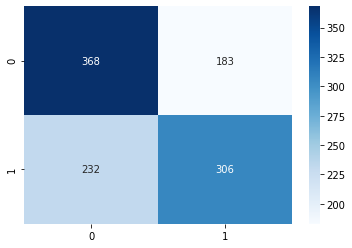

In [204]:
ann_cm = confusion_matrix(y_test, keras_grid.predict(X_scale_test))
sns.heatmap(ann_cm, annot=True, fmt = 'd', cmap = 'Blues');

In [205]:
roc_auc_score(y_test, keras_grid.predict(X_scale_test).flatten())

0.618324911111261

# Removing unscaled factors:

In [206]:
X_continuous_train = X_scale_train.loc[:, scale_columns]
X_continuous_test = X_scale_test.loc[:, scale_columns]

In [207]:
nn_params = {
    'dropout': [.2, .4, .6, .8],
    'n_size': [16, 32, 64, 128],
    'input_size': [X_continuous_train.shape[1]]
}

In [208]:
mod = KerasClassifier(build_fn=get_model)
keras_grid_2 = GridSearchCV(estimator=mod, param_grid=nn_params)

In [209]:
keras_grid_2.fit(X_continuous_train, np.array(y_train), batch_size=32, epochs=20)

Train on 3484 samples
Epoch 1/20
3484/3484 [==============================] - 0s 105us/sample - loss: 0.7342 - accuracy: 0.5514
Epoch 2/20
3484/3484 [==============================] - 0s 42us/sample - loss: 0.6787 - accuracy: 0.5850
Epoch 3/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6638 - accuracy: 0.5930
Epoch 4/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6503 - accuracy: 0.6145
Epoch 5/20
3484/3484 [==============================] - 0s 41us/sample - loss: 0.6413 - accuracy: 0.6211
Epoch 6/20
3484/3484 [==============================] - 0s 41us/sample - loss: 0.6431 - accuracy: 0.6188
Epoch 7/20
3484/3484 [==============================] - 0s 41us/sample - loss: 0.6339 - accuracy: 0.6332
Epoch 8/20
3484/3484 [==============================] - 0s 41us/sample - loss: 0.6304 - accuracy: 0.6329
Epoch 9/20
3484/3484 [==============================] - 0s 39us/sample - loss: 0.6255 - accuracy: 0.6352
Epoch 10/20
3484/3484 [=========

3485/3485 [==============================] - 0s 38us/sample - loss: 0.6161 - accuracy: 0.6425
Epoch 16/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6084 - accuracy: 0.6560
Epoch 17/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6020 - accuracy: 0.6631
Epoch 18/20
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6053 - accuracy: 0.6628
Epoch 19/20
3485/3485 [==============================] - 0s 54us/sample - loss: 0.5985 - accuracy: 0.6617
Epoch 20/20
871/871 [==============================] - 0s 84us/sample - loss: 0.6410 - accuracy: 0.6223
Train on 3485 samples
Epoch 1/20
3485/3485 [==============================] - 0s 142us/sample - loss: 0.7186 - accuracy: 0.5590
Epoch 2/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6775 - accuracy: 0.5879
Epoch 3/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6633 - accuracy: 0.6020
Epoch 4/20
3485/3485 [==================

Epoch 8/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6144 - accuracy: 0.6516
Epoch 9/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6107 - accuracy: 0.6608
Epoch 10/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6098 - accuracy: 0.6505
Epoch 11/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6000 - accuracy: 0.6671
Epoch 12/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.5940 - accuracy: 0.6740
Epoch 13/20
3485/3485 [==============================] - ETA: 0s - loss: 0.5949 - accuracy: 0.67 - 0s 40us/sample - loss: 0.5966 - accuracy: 0.6692
Epoch 14/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.5945 - accuracy: 0.6714
Epoch 15/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.5914 - accuracy: 0.6726
Epoch 16/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.5813 - accuracy: 0.6801
Epoch 

3485/3485 [==============================] - 0s 109us/sample - loss: 0.7189 - accuracy: 0.5521
Epoch 2/20
3485/3485 [==============================] - 0s 53us/sample - loss: 0.6624 - accuracy: 0.6066
Epoch 3/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6388 - accuracy: 0.6281
Epoch 4/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6299 - accuracy: 0.6301
Epoch 5/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6198 - accuracy: 0.6436
Epoch 6/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6189 - accuracy: 0.6473
Epoch 7/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6060 - accuracy: 0.6580
Epoch 8/20
3485/3485 [==============================] - 0s 45us/sample - loss: 0.6026 - accuracy: 0.6674
Epoch 9/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5944 - accuracy: 0.6766
Epoch 10/20
3485/3485 [==============================] - 0s 53us/

3485/3485 [==============================] - 0s 43us/sample - loss: 0.5621 - accuracy: 0.7056
Epoch 16/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5589 - accuracy: 0.7133
Epoch 17/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5559 - accuracy: 0.7105
Epoch 18/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5465 - accuracy: 0.7194
Epoch 19/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.5507 - accuracy: 0.7122
Epoch 20/20
871/871 [==============================] - 0s 80us/sample - loss: 0.6764 - accuracy: 0.6005
Train on 3484 samples
Epoch 1/20
3484/3484 [==============================] - 0s 121us/sample - loss: 0.6973 - accuracy: 0.5649
Epoch 2/20
3484/3484 [==============================] - 0s 53us/sample - loss: 0.6431 - accuracy: 0.6251
Epoch 3/20
3484/3484 [==============================] - 0s 53us/sample - loss: 0.6299 - accuracy: 0.6369
Epoch 4/20
3484/3484 [==================

3485/3485 [==============================] - 0s 47us/sample - loss: 0.5805 - accuracy: 0.6898
Epoch 9/20
3485/3485 [==============================] - 0s 46us/sample - loss: 0.5704 - accuracy: 0.7022
Epoch 10/20
3485/3485 [==============================] - 0s 50us/sample - loss: 0.5611 - accuracy: 0.7047
Epoch 11/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5461 - accuracy: 0.7194
Epoch 12/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5536 - accuracy: 0.7073
Epoch 13/20
3485/3485 [==============================] - 0s 45us/sample - loss: 0.5428 - accuracy: 0.7225
Epoch 14/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5360 - accuracy: 0.7260
Epoch 15/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5239 - accuracy: 0.7340
Epoch 16/20
3485/3485 [==============================] - 0s 46us/sample - loss: 0.5213 - accuracy: 0.7357
Epoch 17/20
3485/3485 [==============================] - 0s

3485/3485 [==============================] - 0s 97us/sample - loss: 0.7665 - accuracy: 0.5504
Epoch 2/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6976 - accuracy: 0.5839
Epoch 3/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6839 - accuracy: 0.5902
Epoch 4/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6623 - accuracy: 0.5997
Epoch 5/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6601 - accuracy: 0.6009
Epoch 6/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6498 - accuracy: 0.6118
Epoch 7/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6389 - accuracy: 0.6212
Epoch 8/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6420 - accuracy: 0.6267
Epoch 9/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6340 - accuracy: 0.6253
Epoch 10/20
3485/3485 [==============================] - 0s 39us/s

3484/3484 [==============================] - 0s 42us/sample - loss: 0.6108 - accuracy: 0.6501s - loss: 0.6044 - accuracy: 0.66
Epoch 15/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6098 - accuracy: 0.6590
Epoch 16/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6118 - accuracy: 0.6567s - loss: 0.6074 - accuracy: 0.65
Epoch 17/20
3484/3484 [==============================] - 0s 41us/sample - loss: 0.6063 - accuracy: 0.6599
Epoch 18/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6099 - accuracy: 0.6521
Epoch 19/20
3484/3484 [==============================] - 0s 41us/sample - loss: 0.6058 - accuracy: 0.6582
Epoch 20/20
872/872 [==============================] - 0s 75us/sample - loss: 0.6299 - accuracy: 0.6239
Train on 3485 samples
Epoch 1/20
3485/3485 [==============================] - 0s 99us/sample - loss: 0.7534 - accuracy: 0.5392
Epoch 2/20
3485/3485 [==============================] - 0s 40us/sample - loss: 

3485/3485 [==============================] - 0s 40us/sample - loss: 0.6441 - accuracy: 0.6155
Epoch 7/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6384 - accuracy: 0.6255
Epoch 8/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6297 - accuracy: 0.6350
Epoch 9/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6264 - accuracy: 0.6333
Epoch 10/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6269 - accuracy: 0.6313
Epoch 11/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6175 - accuracy: 0.6482
Epoch 12/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6199 - accuracy: 0.6528
Epoch 13/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6192 - accuracy: 0.6416
Epoch 14/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6156 - accuracy: 0.6488
Epoch 15/20
3485/3485 [==============================] - 0s 4

871/871 [==============================] - 0s 81us/sample - loss: 0.6737 - accuracy: 0.6028
Train on 3485 samples
Epoch 1/20
3485/3485 [==============================] - 0s 106us/sample - loss: 0.6987 - accuracy: 0.5719
Epoch 2/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6733 - accuracy: 0.5877
Epoch 3/20
3485/3485 [==============================] - 0s 51us/sample - loss: 0.6540 - accuracy: 0.6155
Epoch 4/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6456 - accuracy: 0.6161
Epoch 5/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6368 - accuracy: 0.6347
Epoch 6/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6302 - accuracy: 0.6373
Epoch 7/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6200 - accuracy: 0.6448
Epoch 8/20
3485/3485 [==============================] - 0s 44us/sample - loss: 0.6198 - accuracy: 0.6485
Epoch 9/20
3485/3485 [=======================

3485/3485 [==============================] - 0s 47us/sample - loss: 0.5770 - accuracy: 0.6901
Epoch 14/20
3485/3485 [==============================] - 0s 46us/sample - loss: 0.5708 - accuracy: 0.6947
Epoch 15/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.5728 - accuracy: 0.6933
Epoch 16/20
3485/3485 [==============================] - 0s 45us/sample - loss: 0.5670 - accuracy: 0.6976
Epoch 17/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5618 - accuracy: 0.7082
Epoch 18/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.5618 - accuracy: 0.6961
Epoch 19/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.5578 - accuracy: 0.7096
Epoch 20/20
871/871 [==============================] - 0s 78us/sample - loss: 0.6508 - accuracy: 0.6406
Train on 3485 samples
Epoch 1/20
3485/3485 [==============================] - 0s 112us/sample - loss: 0.7090 - accuracy: 0.5782
Epoch 2/20
3485/3485 [================

3484/3484 [==============================] - 0s 39us/sample - loss: 0.6765 - accuracy: 0.5982
Epoch 7/20
3484/3484 [==============================] - 0s 39us/sample - loss: 0.6636 - accuracy: 0.5936
Epoch 8/20
3484/3484 [==============================] - 0s 40us/sample - loss: 0.6630 - accuracy: 0.6105
Epoch 9/20
3484/3484 [==============================] - 0s 39us/sample - loss: 0.6603 - accuracy: 0.5999
Epoch 10/20
3484/3484 [==============================] - 0s 39us/sample - loss: 0.6566 - accuracy: 0.6039
Epoch 11/20
3484/3484 [==============================] - 0s 39us/sample - loss: 0.6553 - accuracy: 0.6073
Epoch 12/20
3484/3484 [==============================] - 0s 39us/sample - loss: 0.6455 - accuracy: 0.6137
Epoch 13/20
3484/3484 [==============================] - 0s 39us/sample - loss: 0.6520 - accuracy: 0.6048
Epoch 14/20
3484/3484 [==============================] - 0s 39us/sample - loss: 0.6459 - accuracy: 0.6223
Epoch 15/20
3484/3484 [==============================] - 0s 4

871/871 [==============================] - 0s 88us/sample - loss: 0.6348 - accuracy: 0.6418
Train on 3485 samples
Epoch 1/20
3485/3485 [==============================] - 0s 107us/sample - loss: 0.8118 - accuracy: 0.5286
Epoch 2/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.7178 - accuracy: 0.5578
Epoch 3/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6907 - accuracy: 0.5736
Epoch 4/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6706 - accuracy: 0.5813
Epoch 5/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6651 - accuracy: 0.5879
Epoch 6/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6634 - accuracy: 0.6023
Epoch 7/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6652 - accuracy: 0.5980
Epoch 8/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6540 - accuracy: 0.6129
Epoch 9/20
3485/3485 [=======================

3485/3485 [==============================] - 0s 38us/sample - loss: 0.6346 - accuracy: 0.6353
Epoch 14/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6291 - accuracy: 0.6344
Epoch 15/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6280 - accuracy: 0.6336
Epoch 16/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6233 - accuracy: 0.6407
Epoch 17/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6318 - accuracy: 0.6267
Epoch 18/20
3485/3485 [==============================] - 0s 37us/sample - loss: 0.6223 - accuracy: 0.6439
Epoch 19/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6255 - accuracy: 0.6382
Epoch 20/20
871/871 [==============================] - 0s 83us/sample - loss: 0.6654 - accuracy: 0.6142
Train on 3485 samples
Epoch 1/20
3485/3485 [==============================] - 0s 106us/sample - loss: 0.8511 - accuracy: 0.5326
Epoch 2/20
3485/3485 [================

3485/3485 [==============================] - 0s 42us/sample - loss: 0.6522 - accuracy: 0.6189
Epoch 7/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6455 - accuracy: 0.6192
Epoch 8/20
3485/3485 [==============================] - 0s 41us/sample - loss: 0.6319 - accuracy: 0.6373
Epoch 9/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6351 - accuracy: 0.6267
Epoch 10/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6315 - accuracy: 0.6399
Epoch 11/20
3485/3485 [==============================] - 0s 45us/sample - loss: 0.6289 - accuracy: 0.6353
Epoch 12/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6247 - accuracy: 0.6425
Epoch 13/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6190 - accuracy: 0.6445
Epoch 14/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6231 - accuracy: 0.6473
Epoch 15/20
3485/3485 [==============================] - 0s 4

871/871 [==============================] - 0s 84us/sample - loss: 0.6372 - accuracy: 0.6303
Train on 3484 samples
Epoch 1/20
3484/3484 [==============================] - 0s 108us/sample - loss: 0.7609 - accuracy: 0.5497
Epoch 2/20
3484/3484 [==============================] - 0s 51us/sample - loss: 0.7015 - accuracy: 0.5875
Epoch 3/20
3484/3484 [==============================] - 0s 46us/sample - loss: 0.6652 - accuracy: 0.6088
Epoch 4/20
3484/3484 [==============================] - 0s 46us/sample - loss: 0.6509 - accuracy: 0.6274
Epoch 5/20
3484/3484 [==============================] - 0s 46us/sample - loss: 0.6449 - accuracy: 0.6292
Epoch 6/20
3484/3484 [==============================] - 0s 45us/sample - loss: 0.6465 - accuracy: 0.6203
Epoch 7/20
3484/3484 [==============================] - 0s 47us/sample - loss: 0.6289 - accuracy: 0.6421
Epoch 8/20
3484/3484 [==============================] - 0s 48us/sample - loss: 0.6240 - accuracy: 0.6447
Epoch 9/20
3484/3484 [=======================

3485/3485 [==============================] - 0s 48us/sample - loss: 0.6050 - accuracy: 0.6620
Epoch 14/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.6059 - accuracy: 0.6623
Epoch 15/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.5992 - accuracy: 0.6648
Epoch 16/20
3485/3485 [==============================] - 0s 46us/sample - loss: 0.5986 - accuracy: 0.6714
Epoch 17/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.5910 - accuracy: 0.6789
Epoch 18/20
3485/3485 [==============================] - 0s 49us/sample - loss: 0.5988 - accuracy: 0.6729
Epoch 19/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.5920 - accuracy: 0.6778
Epoch 20/20
871/871 [==============================] - 0s 80us/sample - loss: 0.6425 - accuracy: 0.6487
Train on 3485 samples
Epoch 1/20
3485/3485 [==============================] - 0s 106us/sample - loss: 0.7591 - accuracy: 0.5570
Epoch 2/20
3485/3485 [================

3485/3485 [==============================] - 0s 40us/sample - loss: 0.7027 - accuracy: 0.5667
Epoch 7/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6874 - accuracy: 0.5725
Epoch 8/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6856 - accuracy: 0.5647
Epoch 9/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6717 - accuracy: 0.5868
Epoch 10/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6714 - accuracy: 0.5813
Epoch 11/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6664 - accuracy: 0.5819
Epoch 12/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6726 - accuracy: 0.5725
Epoch 13/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6614 - accuracy: 0.5971
Epoch 14/20
3485/3485 [==============================] - 0s 39us/sample - loss: 0.6708 - accuracy: 0.5722
Epoch 15/20
3485/3485 [==============================] - 0s 3

872/872 [==============================] - 0s 83us/sample - loss: 0.6347 - accuracy: 0.6273
Train on 3485 samples
Epoch 1/20
3485/3485 [==============================] - 0s 109us/sample - loss: 0.9845 - accuracy: 0.5211
Epoch 2/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.8319 - accuracy: 0.5432
Epoch 3/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.7667 - accuracy: 0.5455
Epoch 4/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.7161 - accuracy: 0.5656
Epoch 5/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.7008 - accuracy: 0.5693
Epoch 6/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6924 - accuracy: 0.5693
Epoch 7/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6744 - accuracy: 0.5879
Epoch 8/20
3485/3485 [==============================] - 0s 40us/sample - loss: 0.6686 - accuracy: 0.6003
Epoch 9/20
3485/3485 [=======================

3485/3485 [==============================] - 0s 37us/sample - loss: 0.6517 - accuracy: 0.6057
Epoch 14/20
3485/3485 [==============================] - 0s 37us/sample - loss: 0.6559 - accuracy: 0.6066
Epoch 15/20
3485/3485 [==============================] - 0s 37us/sample - loss: 0.6546 - accuracy: 0.5931
Epoch 16/20
3485/3485 [==============================] - 0s 37us/sample - loss: 0.6536 - accuracy: 0.6069
Epoch 17/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6530 - accuracy: 0.5991
Epoch 18/20
3485/3485 [==============================] - 0s 37us/sample - loss: 0.6519 - accuracy: 0.6032
Epoch 19/20
3485/3485 [==============================] - 0s 38us/sample - loss: 0.6443 - accuracy: 0.6115
Epoch 20/20
871/871 [==============================] - 0s 82us/sample - loss: 0.6436 - accuracy: 0.6119
Train on 3484 samples
Epoch 1/20
3484/3484 [==============================] - 0s 110us/sample - loss: 0.9687 - accuracy: 0.5241
Epoch 2/20
3484/3484 [================

Epoch 6/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6862 - accuracy: 0.5836
Epoch 7/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6708 - accuracy: 0.5902
Epoch 8/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6581 - accuracy: 0.5986
Epoch 9/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6593 - accuracy: 0.5920
Epoch 10/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6545 - accuracy: 0.6126
Epoch 11/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6521 - accuracy: 0.6143
Epoch 12/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6535 - accuracy: 0.6052
Epoch 13/20
3485/3485 [==============================] - 0s 43us/sample - loss: 0.6442 - accuracy: 0.6152
Epoch 14/20
3485/3485 [==============================] - 0s 42us/sample - loss: 0.6343 - accuracy: 0.6287
Epoch 15/20
3485/3485 [===========================

Epoch 20/20
871/871 [==============================] - 0s 76us/sample - loss: 0.6418 - accuracy: 0.6165
Train on 3485 samples
Epoch 1/20
3485/3485 [==============================] - 0s 111us/sample - loss: 0.8279 - accuracy: 0.5532
Epoch 2/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.7418 - accuracy: 0.5681
Epoch 3/20
3485/3485 [==============================] - 0s 47us/sample - loss: 0.7012 - accuracy: 0.5914
Epoch 4/20
3485/3485 [==============================] - 0s 49us/sample - loss: 0.6743 - accuracy: 0.6121
Epoch 5/20
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6672 - accuracy: 0.6040
Epoch 6/20
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6670 - accuracy: 0.6089
Epoch 7/20
3485/3485 [==============================] - 0s 48us/sample - loss: 0.6453 - accuracy: 0.6146
Epoch 8/20
3485/3485 [==============================] - 0s 46us/sample - loss: 0.6416 - accuracy: 0.6261
Epoch 9/20
3485/3485 [===========

4356/4356 [==============================] - 0s 42us/sample - loss: 0.5966 - accuracy: 0.6678
Epoch 14/20
4356/4356 [==============================] - 0s 38us/sample - loss: 0.5974 - accuracy: 0.6648
Epoch 15/20
4356/4356 [==============================] - 0s 42us/sample - loss: 0.5928 - accuracy: 0.6784
Epoch 16/20
4356/4356 [==============================] - 0s 44us/sample - loss: 0.5876 - accuracy: 0.6820
Epoch 17/20
4356/4356 [==============================] - 0s 42us/sample - loss: 0.5887 - accuracy: 0.6795
Epoch 18/20
4356/4356 [==============================] - 0s 41us/sample - loss: 0.5885 - accuracy: 0.6752
Epoch 19/20
4356/4356 [==============================] - 0s 40us/sample - loss: 0.5820 - accuracy: 0.6873
Epoch 20/20
4356/4356 [==============================] - 0s 40us/sample - loss: 0.5822 - accuracy: 0.6876


GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EDE24A5DC8>,
             iid='deprecated', n_jobs=None,
             param_grid={'dropout': [0.2, 0.4, 0.6, 0.8], 'input_size': [80],
                         'n_size': [16, 32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [210]:
keras_grid_2.best_estimator_.get_params()

{'dropout': 0.2,
 'input_size': 80,
 'n_size': 32,
 'build_fn': <function __main__.get_model(dropout, n_size, input_size)>}

In [211]:
keras_grid_2.score(X_continuous_test, y_test)

1089/1089 [==============================] - 0s 80us/sample - loss: 0.6478 - accuracy: 0.6143


0.61432505

0.6809383412383028


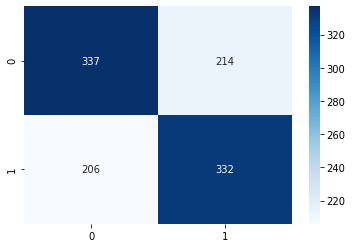

In [215]:
keras_2_cm = confusion_matrix(y_test, keras_grid_2.predict(X_continuous_test))

print(roc_auc_score(y_test, keras_grid_2.predict_proba(X_continuous_test)[:, 1]))

sns.heatmap(keras_2_cm, annot=True, fmt = 'd', cmap = 'Blues');

In [279]:
X_test.shape

(1089, 106)

ROC AUC MLP1: 0.6887915854242708
ROC AUC MLP2: 0.6809383412383028


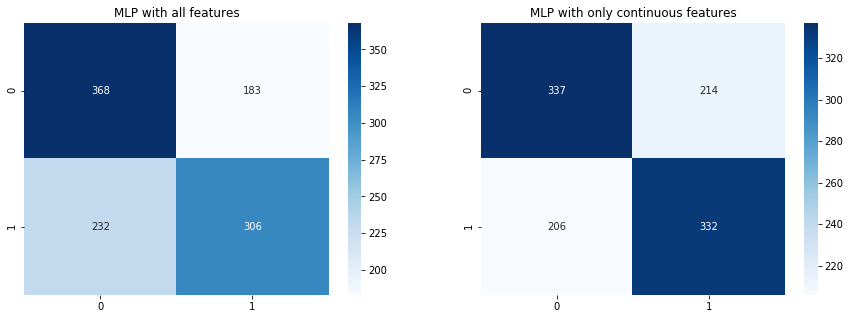

In [289]:
f, ax = plt.subplots(1, 2, figsize=(15,5))

sns.heatmap(ann_cm, annot=True, fmt = 'd', cmap = 'Blues', ax=ax[0]);
sns.heatmap(keras_2_cm, annot=True, fmt = 'd', cmap = 'Blues', ax=ax[1]);

ax[0].set_title('MLP with all features')
ax[1].set_title('MLP with only continuous features')

print('ROC AUC MLP1:', roc_auc_score(y_test, keras_grid.predict_proba(X_scale_test)[:, 1]))
print('ROC AUC MLP2:', roc_auc_score(y_test, keras_grid_2.predict_proba(X_continuous_test)[:, 1]))